<a href="https://colab.research.google.com/github/nichmars/Test/blob/main/AttemptAtPercentChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pandas as pd

# This line will prompt you to select and upload a file from your local machine
uploaded = files.upload()

# Get the name of the uploaded file (assuming only one file is uploaded)
file_name = next(iter(uploaded))

df = pd.read_excel(file_name)



Saving Filtered Data with Subtypes Again (1).xlsx to Filtered Data with Subtypes Again (1).xlsx


In [16]:
df = pd.read_excel(file_name)

# List of metrics we want to analyze
metrics = ["Accounts", "Contributions", "Grants", "Assets"]

# Calculate the difference in years for each 'ein' to check for consecutive years
df = df.sort_values(["ein", "Year"])
df["year_diff"] = df.groupby("ein")["Year"].diff()


# Loop through each metric to calculate percent change and predicted values (ignoring non-consecutive years)
for m in metrics:
    pct_col = f"{m.lower()}_pct_change"

    df[pct_col] = df.groupby("ein")[m].pct_change()
    df.loc[df["year_diff"] != 1, pct_col] = None


#df.head(30)

In [17]:
# Compute median growth for each metric by Year, Type, and subtype
median_growth = (
    df
    .groupby(["Year", "Type", "subtype"])
    [[f"{m.lower()}_pct_change" for m in metrics]]
    .median()
    .reset_index()
)

#median_growth["Year"] = median_growth["Year"] + 1

# Rename columns to indicate these are median growth values
median_growth = median_growth.rename(
    columns={
        f"{m.lower()}_pct_change": f"median_{m.lower()}_growth"
        for m in metrics
    }
)

# Merge the median growth values back into the original DataFrame
df = df.merge(
    median_growth,
    on=["Year", "Type", "subtype"],
    how="left"
)

for m in metrics:
    prev_actual = df.groupby("ein")[m].shift(1)
    df[f"predicted_{m.lower()}"] = prev_actual * (1 + df[f"median_{m.lower()}_growth"])

# Use median growth to predict the next year's value for each metric
#for m in metrics:
#    df[f"predicted_{m.lower()}"] = (
#        df[m] / (1 + df[f"median_{m.lower()}_growth"])
#    )

predictions = df.copy()
predictions["Year"] = predictions["Year"] + 1

In [15]:
#df.head()

In [33]:
df.to_excel(
    "Attempt_at_Imputing.xlsx",
    index=False
)



In [18]:
import numpy as np

# Convert predicted columns to numeric and replace invalid values
pred_cols = ["predicted_accounts", "predicted_contributions",  "predicted_grants", "predicted_assets"]

for col in pred_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.replace([np.inf, -np.inf], np.nan)

# Function to calculate relative error for a column
def relative_error(actual_col, predicted_col):
    valid_rows = df[df[predicted_col].notna()]
    total_actual = valid_rows[actual_col].sum()
    total_predicted = valid_rows[predicted_col].sum()
    RE = (total_actual - total_predicted) / total_actual
    return RE

# Compute relative errors
RE_account = relative_error("Accounts", "predicted_accounts")
RE_contributions = relative_error("Contributions", "predicted_contributions")
RE_grants = relative_error("Grants", "predicted_grants")
RE_assets = relative_error("Assets", "predicted_assets")

print("Relative Error - Account:", abs(RE_account))
print("Relative Error - Contributions:", abs(RE_contributions))
print("Relative Error - Grants:", abs(RE_grants))
print("Relative Error - Assets:", abs(RE_assets))


Relative Error - Account: 0.021589083485291004
Relative Error - Contributions: 0.04956429868804142
Relative Error - Grants: 0.029070548275574773
Relative Error - Assets: 0.04461027367448783


In [19]:
#calculate error between each ein's actual and predicted

#valid_rows_Account = df[df["predicted_accounts"].notna()]



df["Actual Error Accounts"] = -(df["Accounts"] - df["predicted_accounts"])/df["Accounts"]
df["Actual Error Contributions"] = -(df["Contributions"] - df["predicted_contributions"])/df["Contributions"]
df["Actual Error Grants"] = -(df["Grants"] - df["predicted_grants"])/df["Grants"]
df["Actual Error Assets"] = -(df["Assets"] - df["predicted_assets"])/df["Assets"]


#df["Actual Error Accounts"].min()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

errors = []
col_pos_y = df.columns.get_loc('Year')
col_pos_t = df.columns.get_loc('Type')
col_pos_s = df.columns.get_loc('subtype')
col_pos_a = df.columns.get_loc('Actual Error Accounts')
for Year in df['Year'].unique():
  for Type in df['Type'].unique():
    for subtype in df['subtype'].unique():
      errors = []
      for err_ind_a in range(len(df.index)):
        if df.iloc[err_ind_a, col_pos_y] == Year and df.iloc[err_ind_a, col_pos_t] == Type and df.iloc[err_ind_a, col_pos_s] == subtype:
          errors.append(df.iloc[err_ind_a, col_pos_a])
      cleaned_errors = [x for x in errors if not np.isnan(x)]
      if len(cleaned_errors) == 0:
        continue
      print(cleaned_errors)
      '''bins_array = np.arange(-.05, .05, .001)
      plt.hist(cleaned_errors, bins=bins_array)
      plt.title("Accounts Error -" + str(Year) + str(Type) + str(subtype))
      plt.xlabel("Percent Error (Real v Imputed)")
      plt.ylabel("Frequency")
      plt.show()'''

[np.float64(0.026009316770186395), np.float64(-0.04132254464285712), np.float64(-0.16095238095238099), np.float64(0.005825526932084336), np.float64(0.04880952380952386), np.float64(0.027567811934900592), np.float64(0.04880952380952394), np.float64(0.04880952380952393), np.float64(0.014976958525345654), np.float64(-0.04653679653679645), np.float64(0.08765432098765434), np.float64(0.0488095238095239), np.float64(-0.08339335734293718), np.float64(-0.11254578754578745), np.float64(-0.42792207792207787), np.float64(-0.414072891726523), np.float64(-0.16095238095238099), np.float64(0.281878306878307), np.float64(-0.056071428571428564), np.float64(-0.45461904761904764), np.float64(0.230085243974133), np.float64(0.03611207194742312), np.float64(-0.47559523809523807), np.float64(-0.025050301810865205), np.float64(0.09132882882882892), np.float64(0.0488095238095239), np.float64(0.04880952380952381), np.float64(-0.0615914786967418), np.float64(-0.189556277056277), np.float64(0.04880952380952382), 

KeyboardInterrupt: 

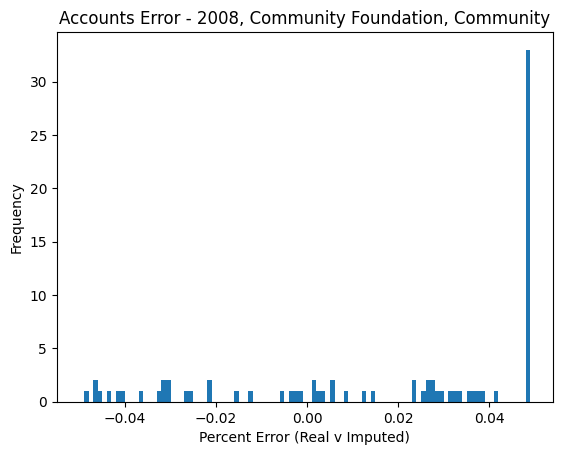

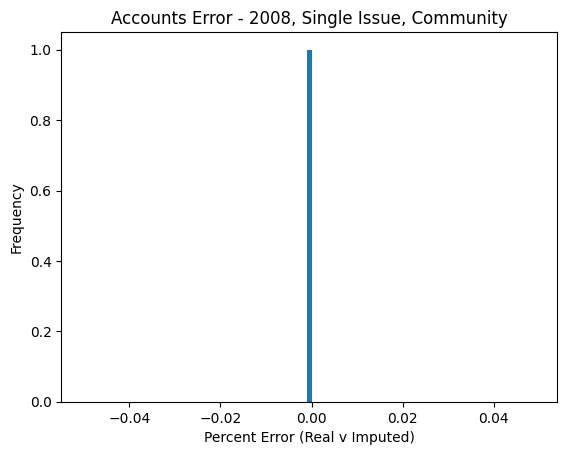

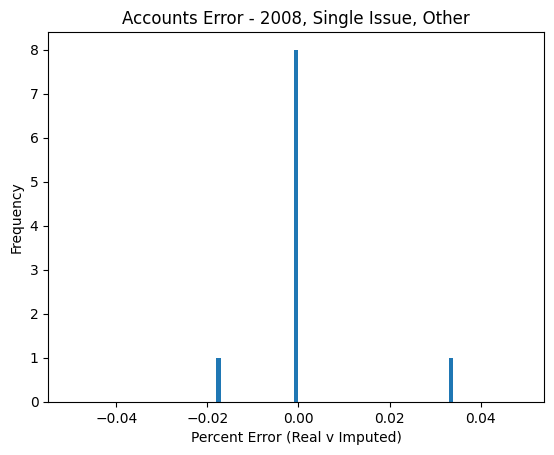

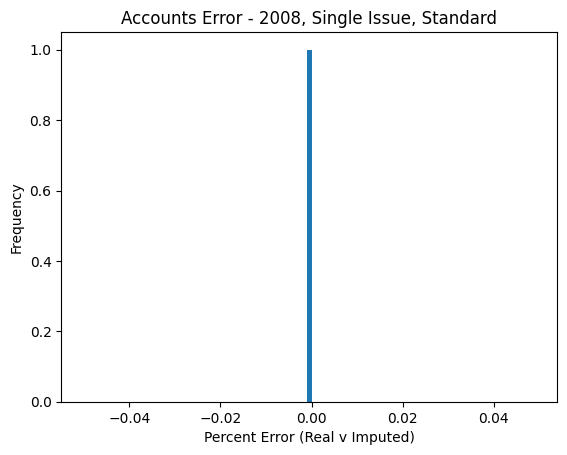

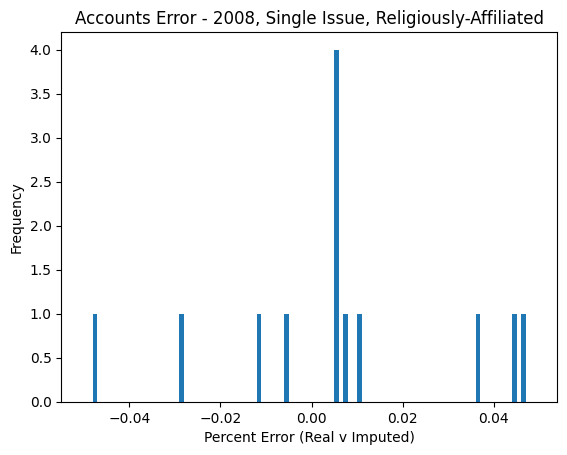

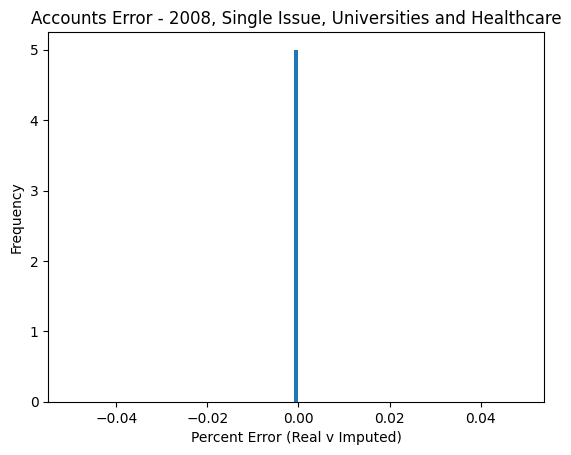

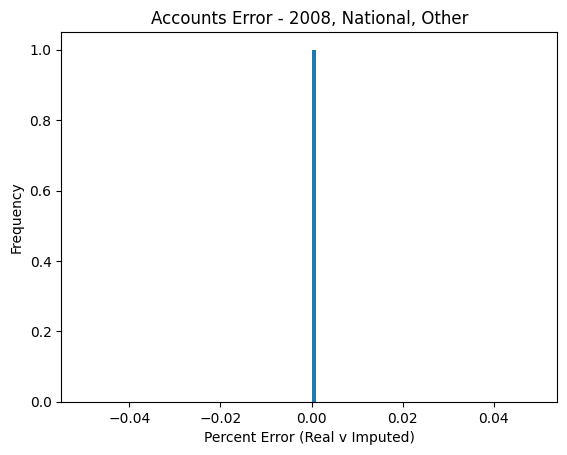

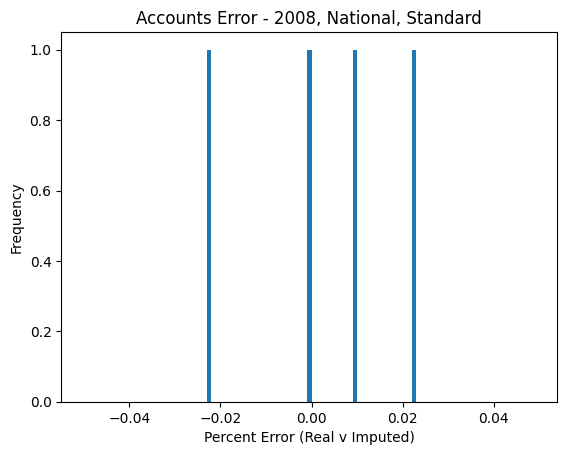

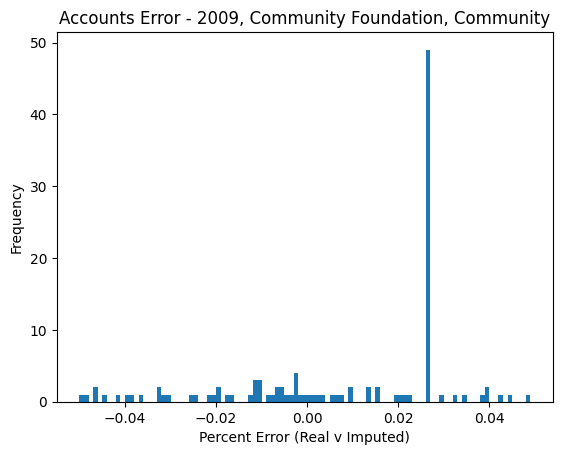

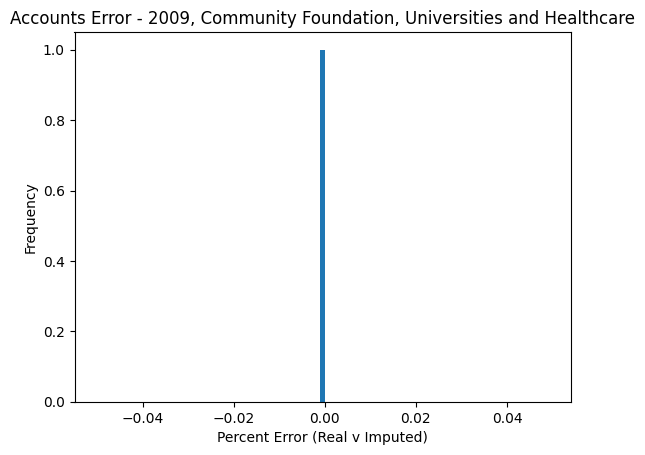

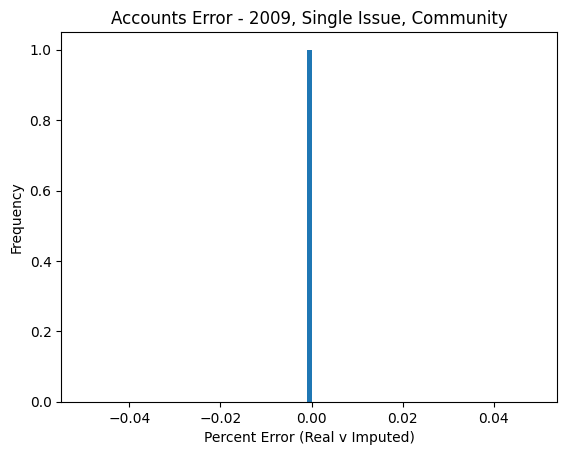

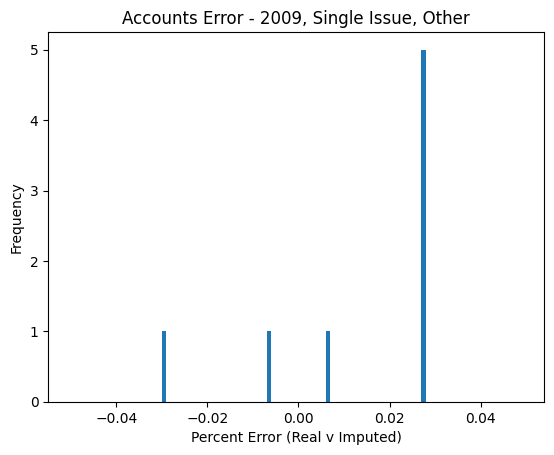

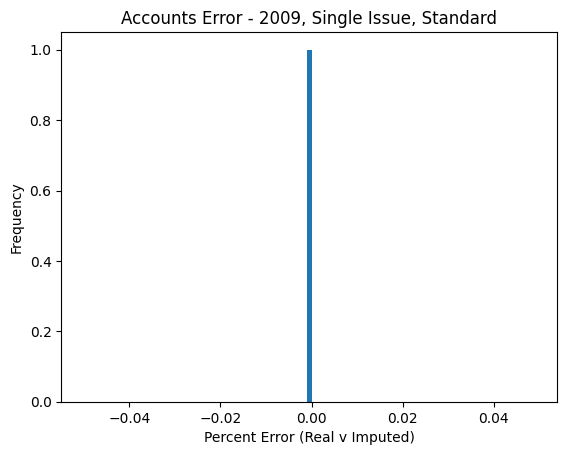

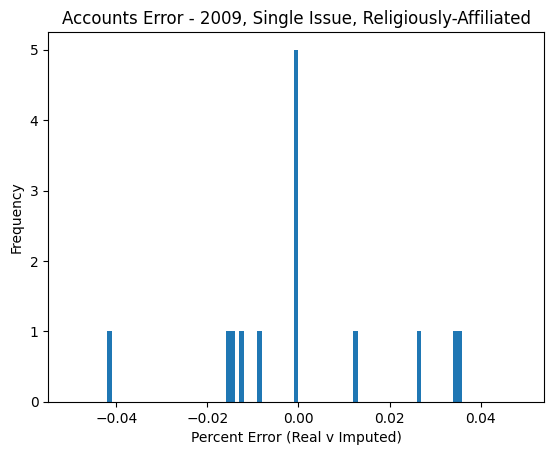

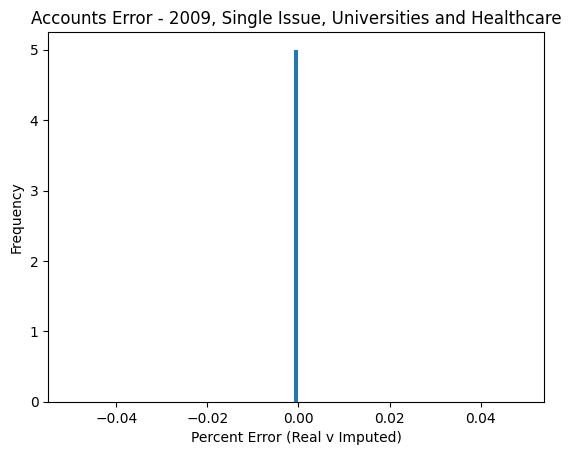

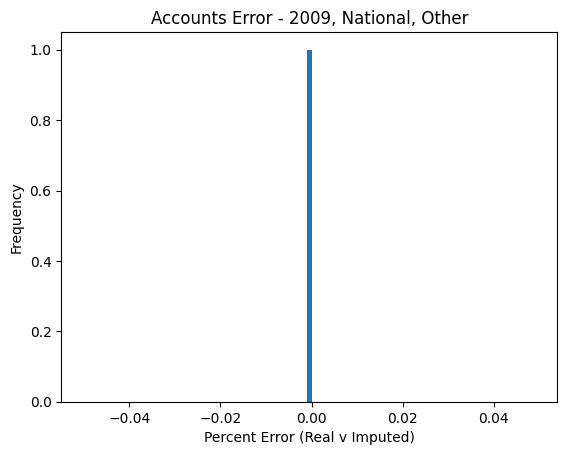

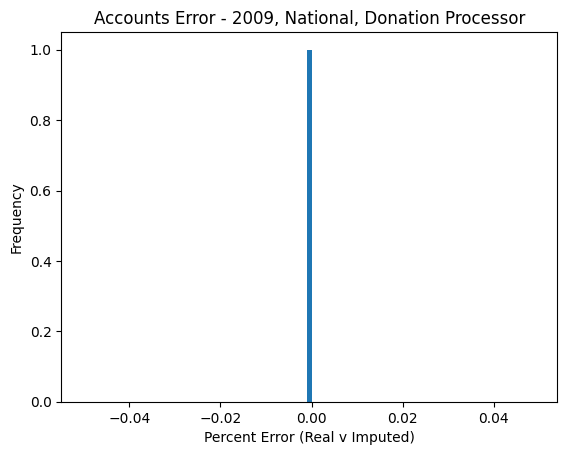

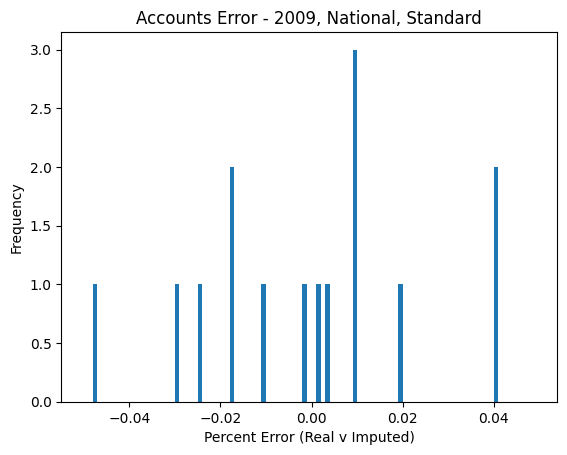

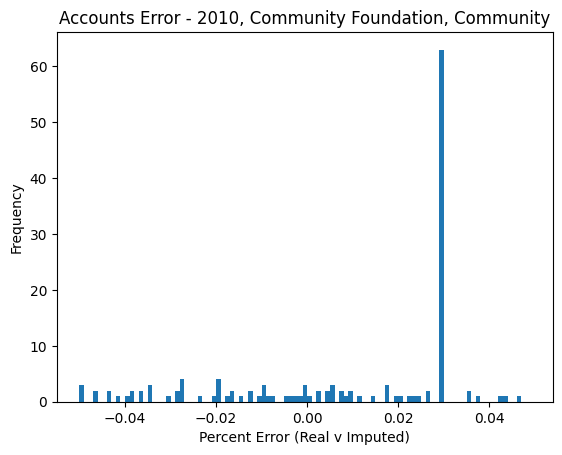

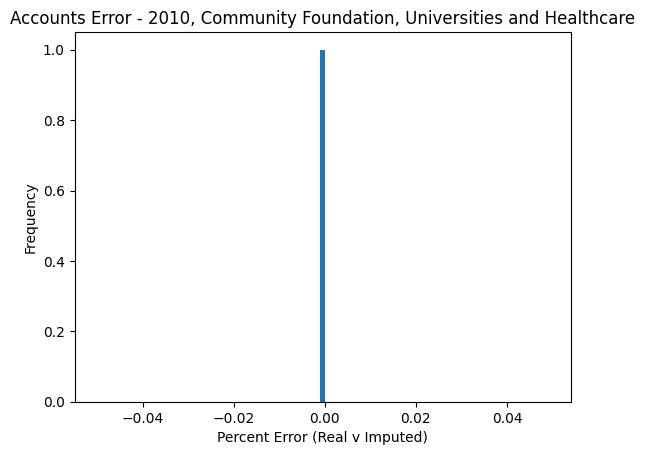

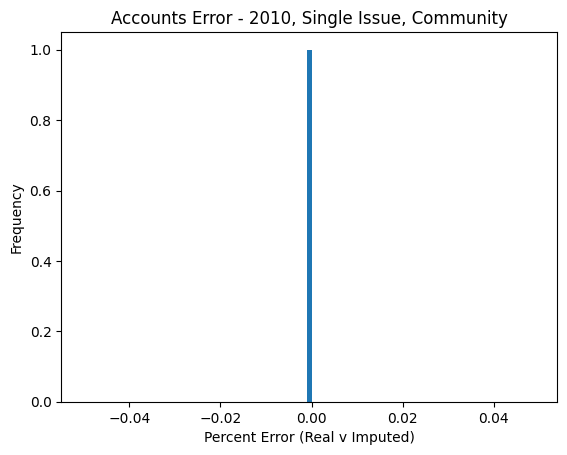

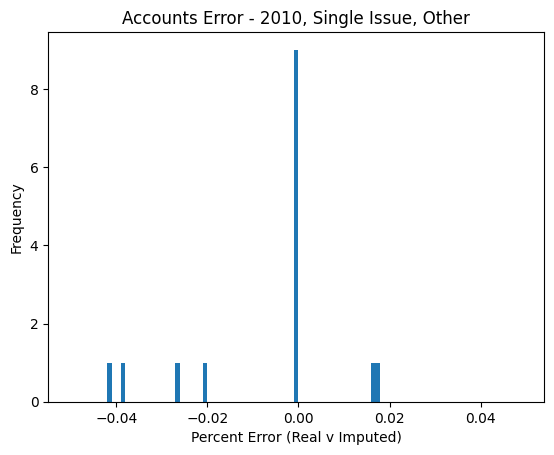

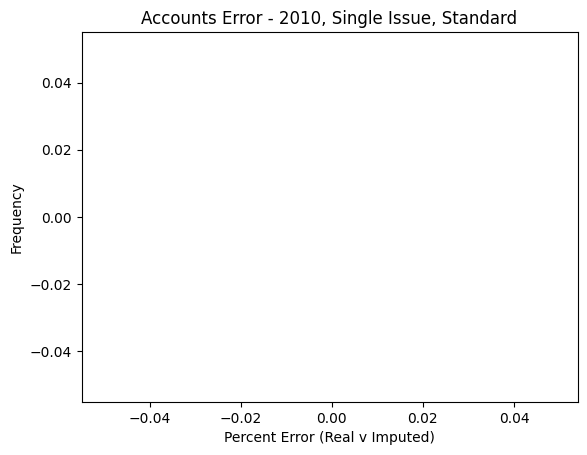

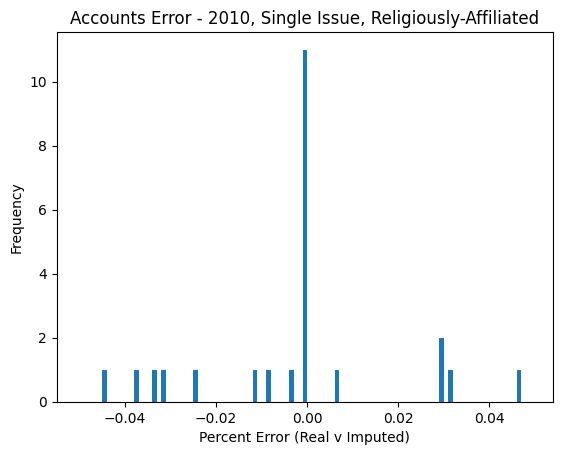

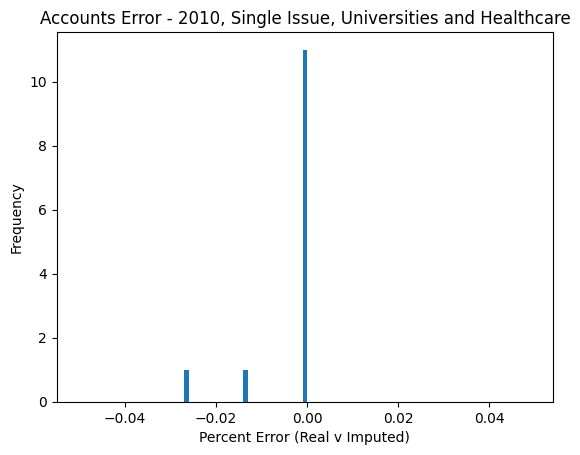

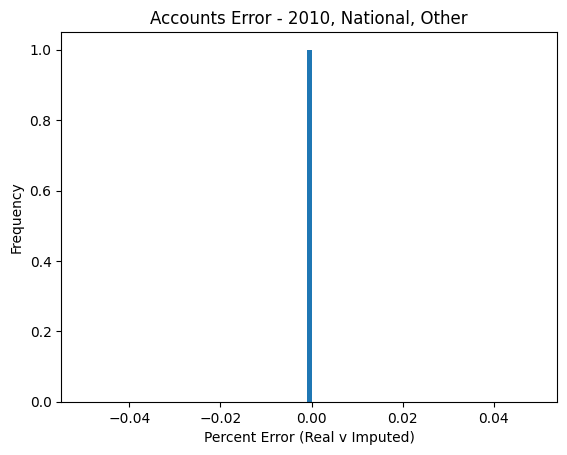

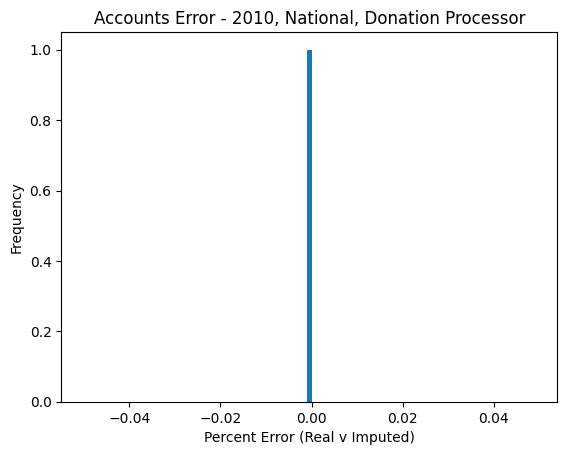

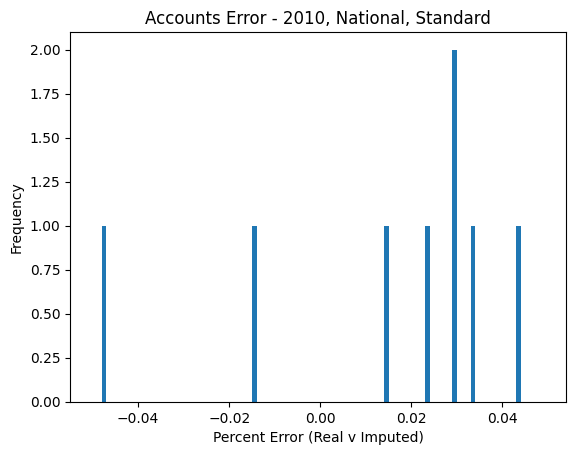

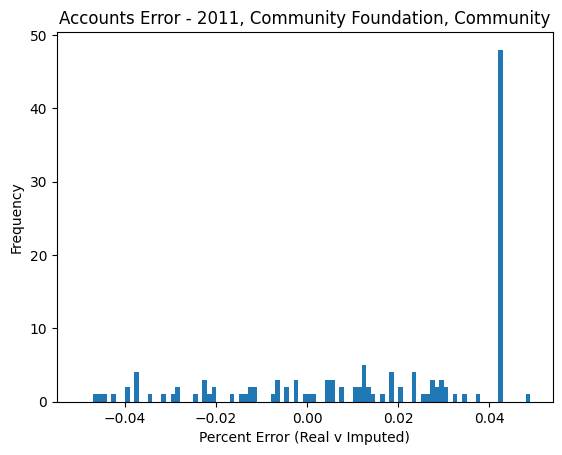

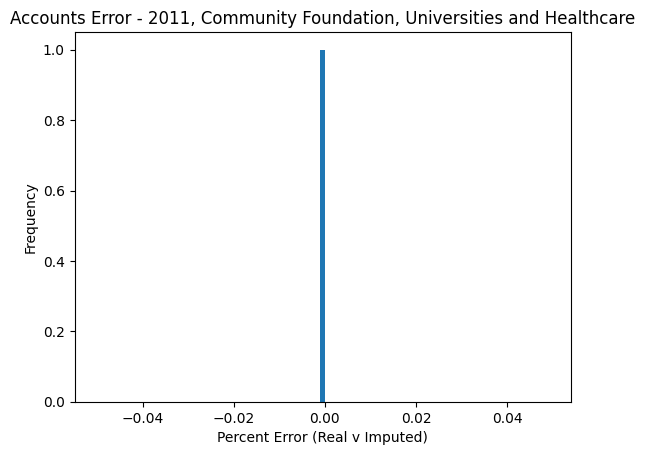

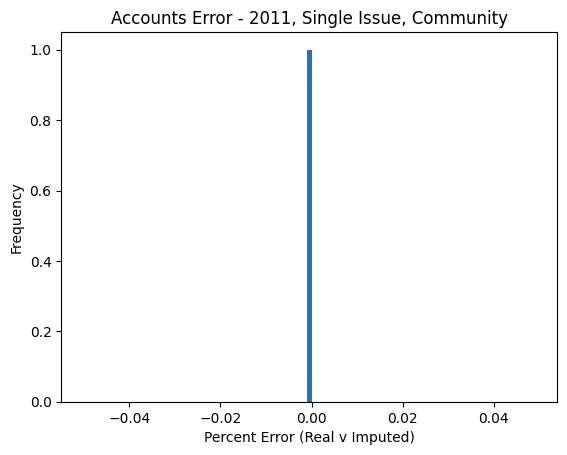

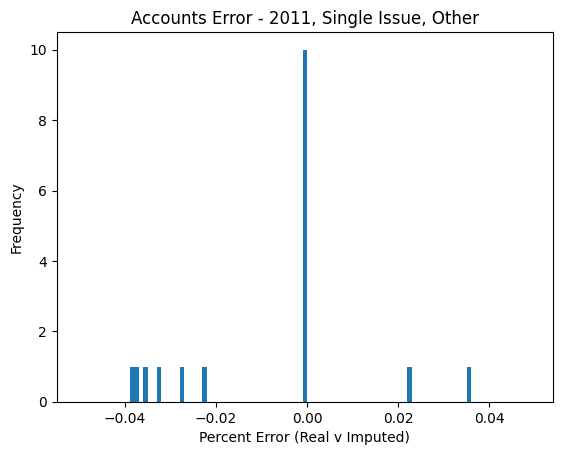

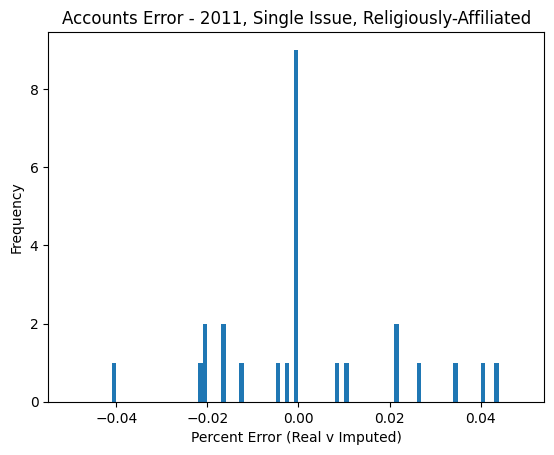

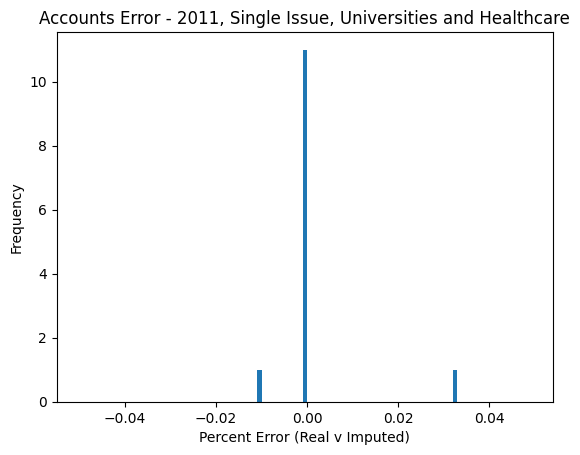

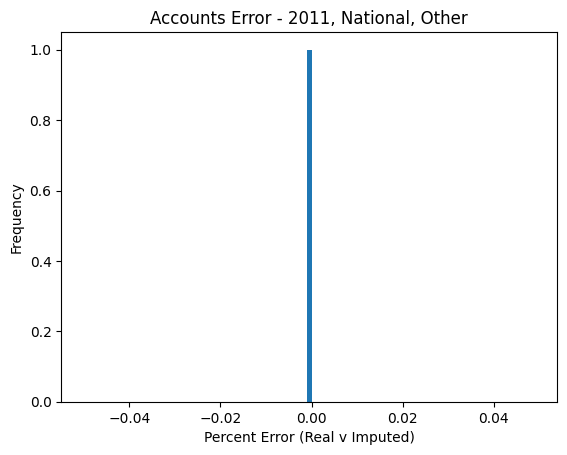

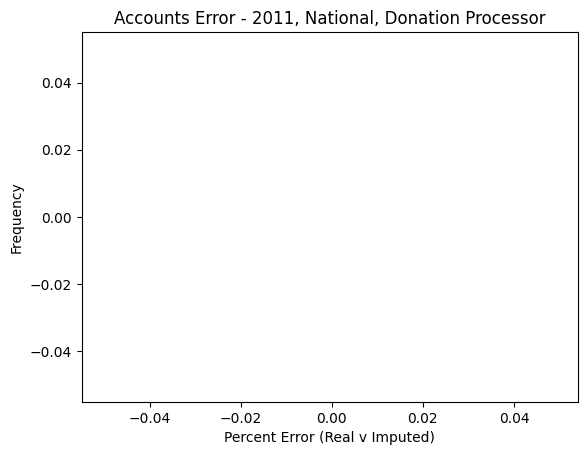

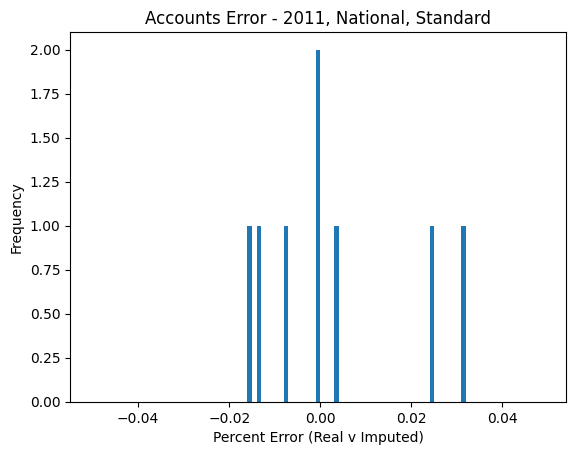

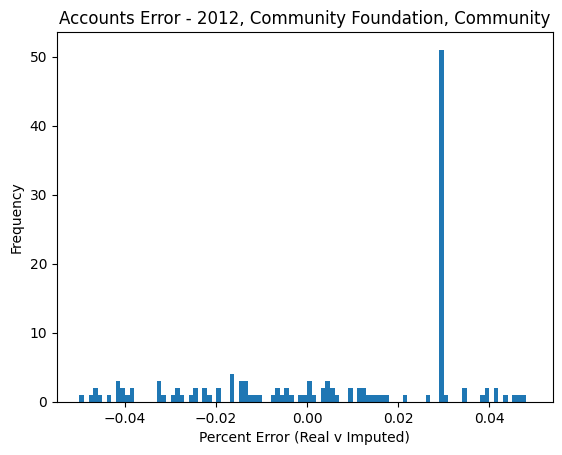

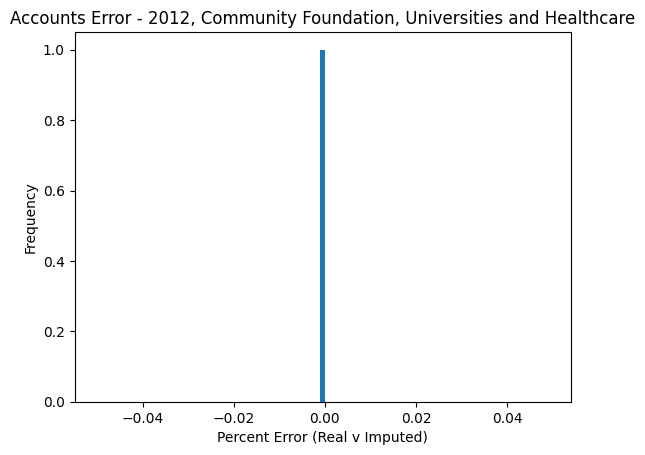

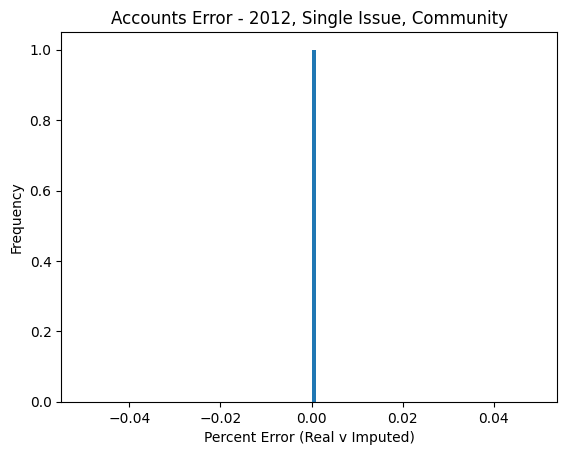

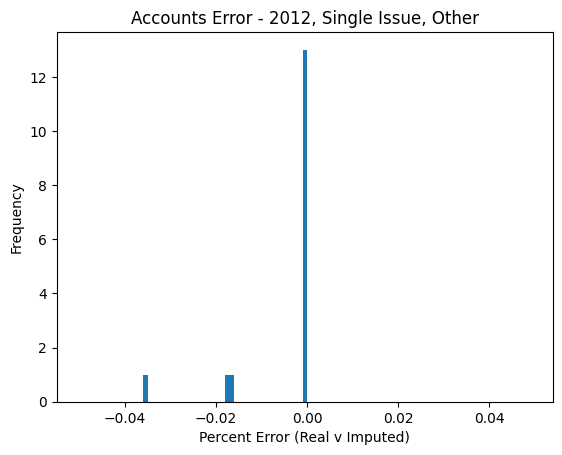

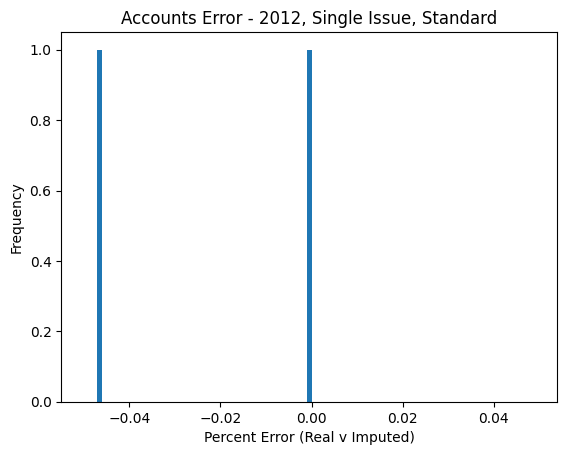

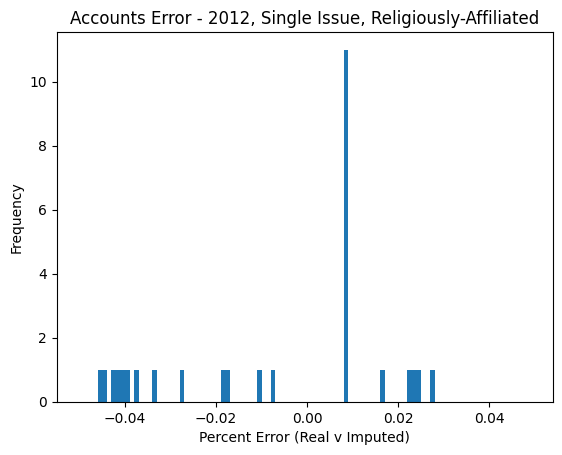

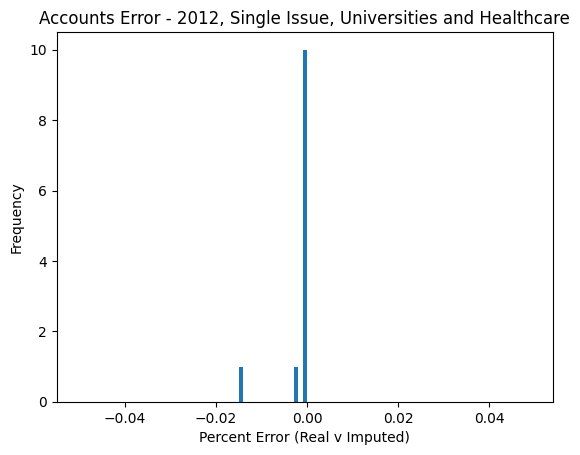

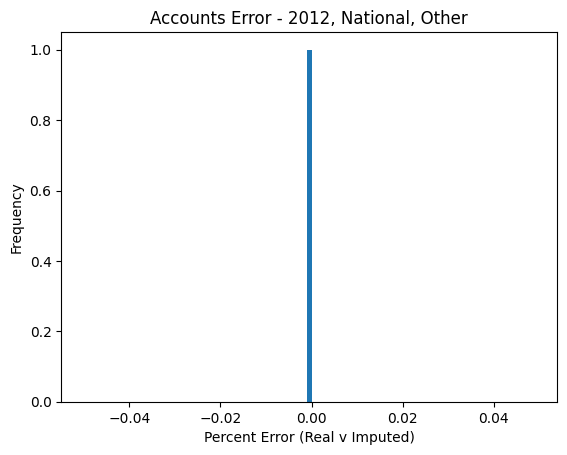

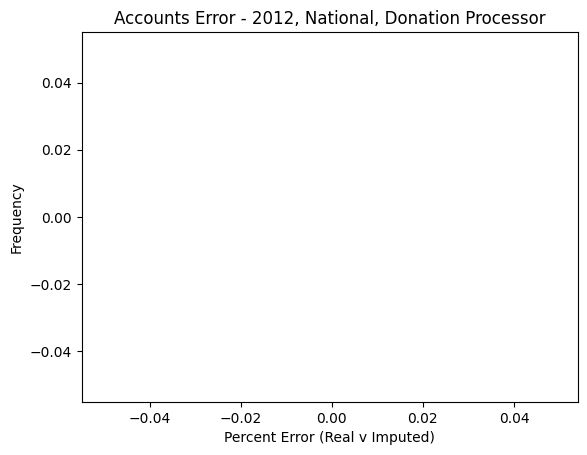

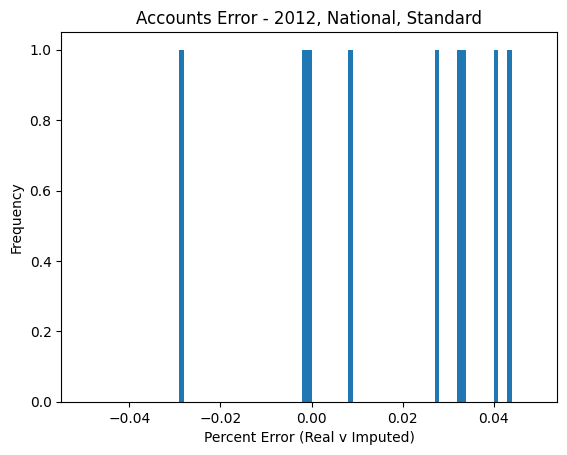

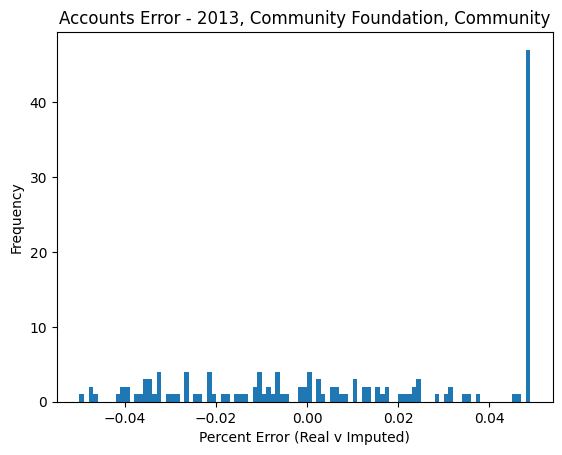

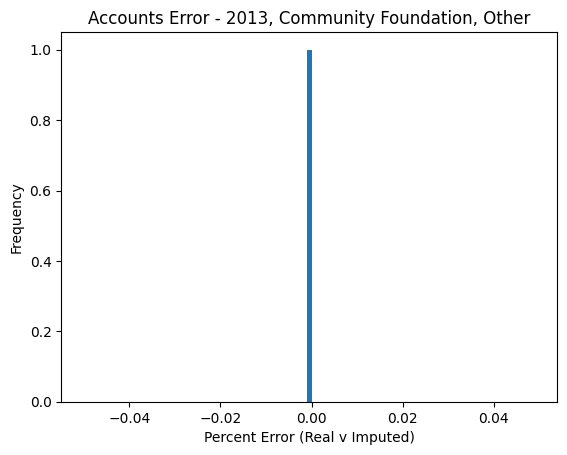

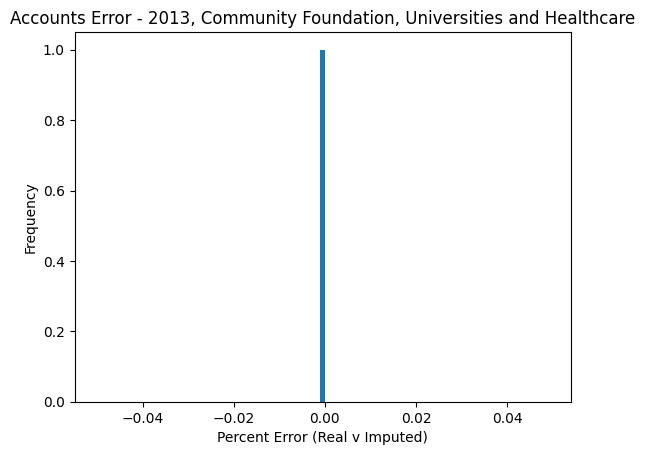

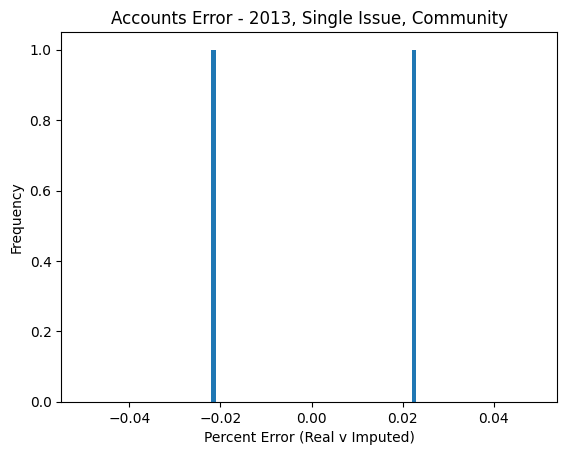

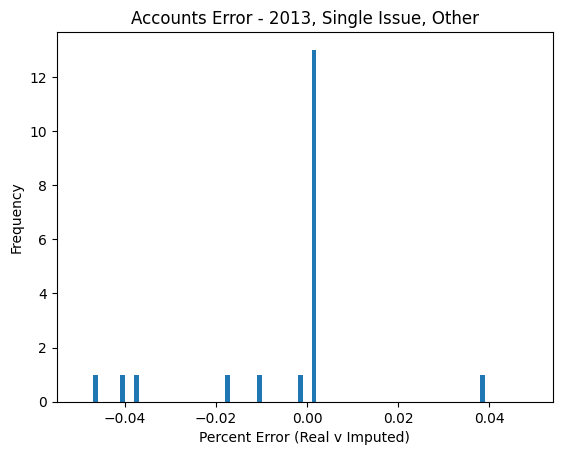

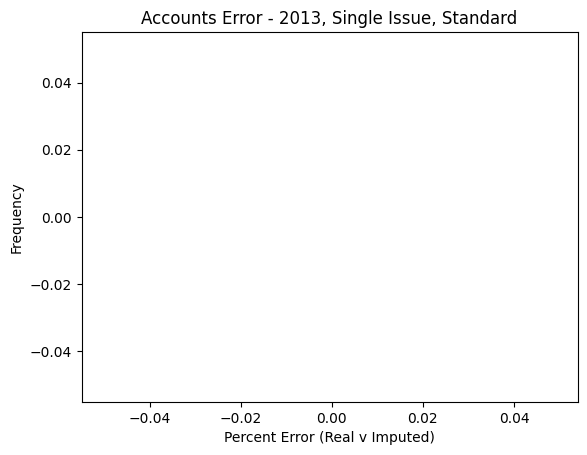

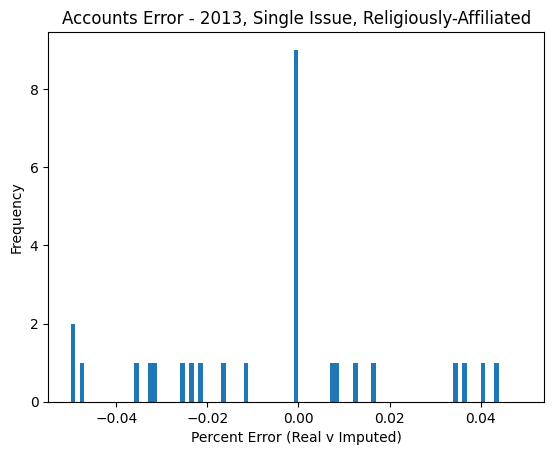

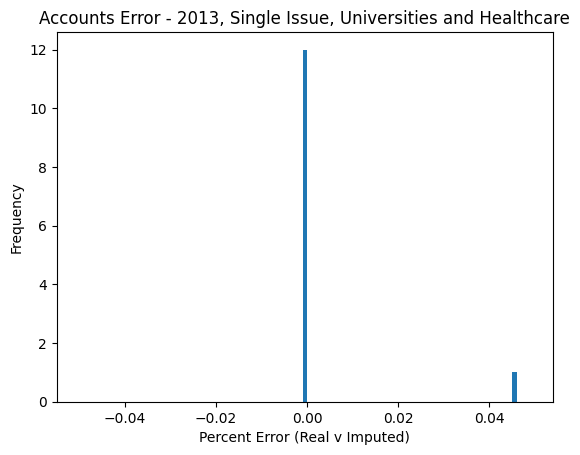

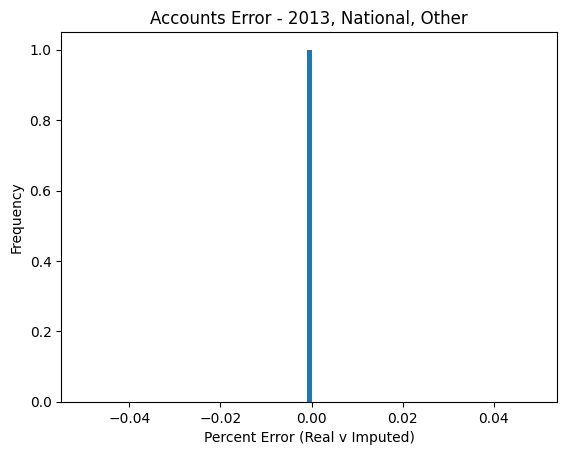

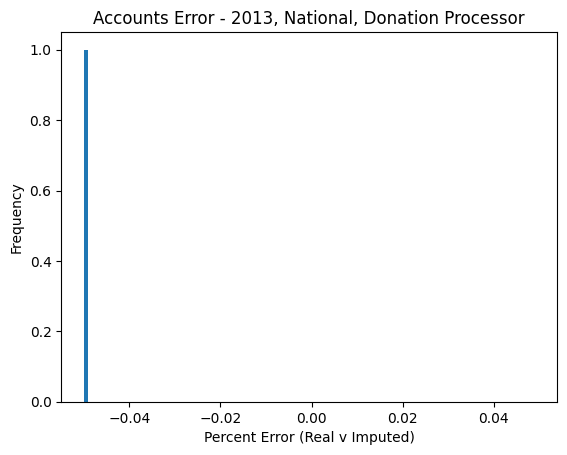

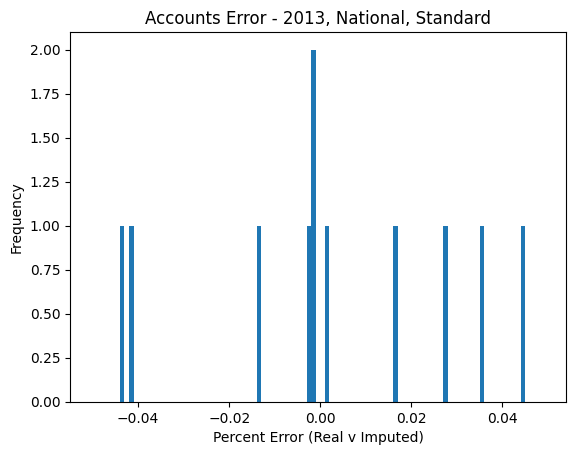

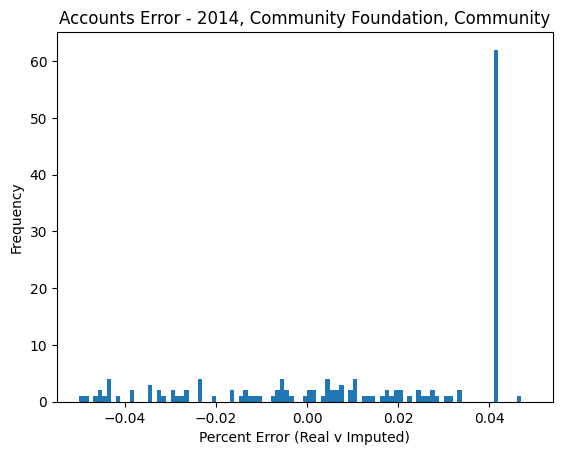

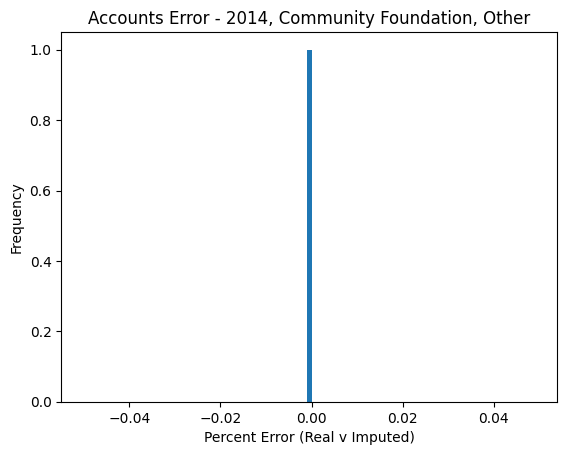

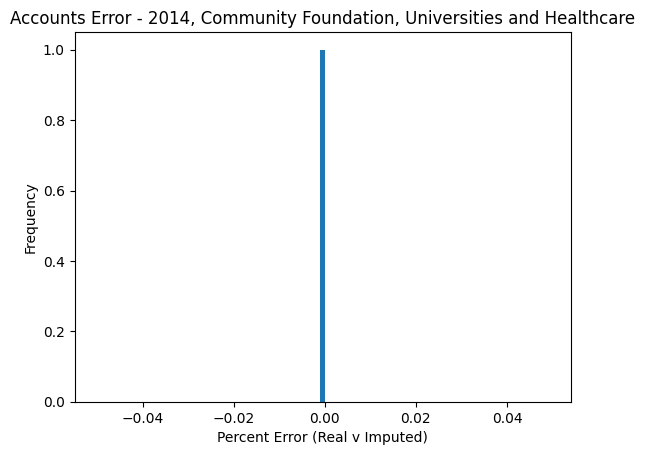

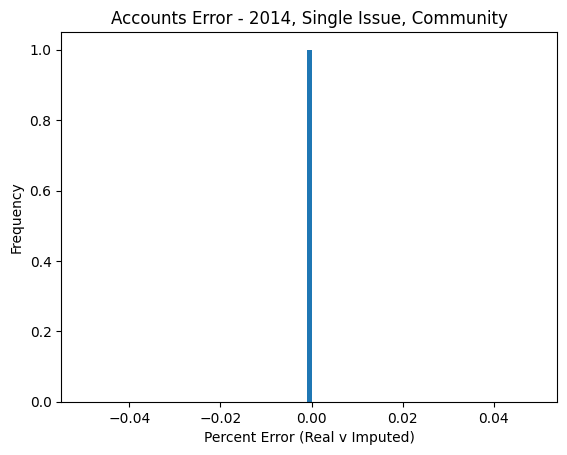

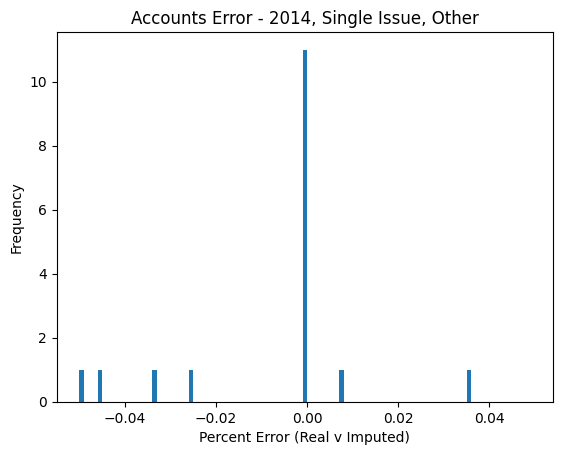

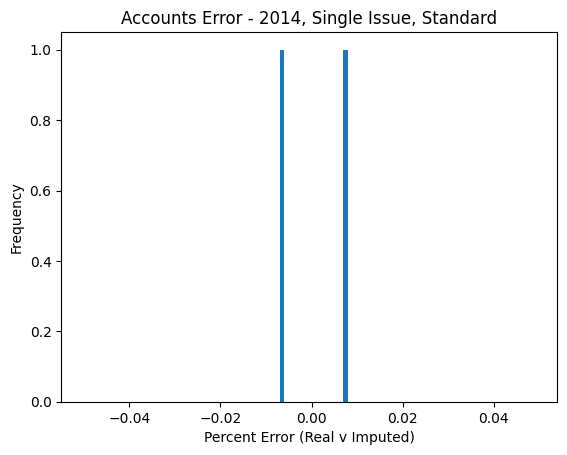

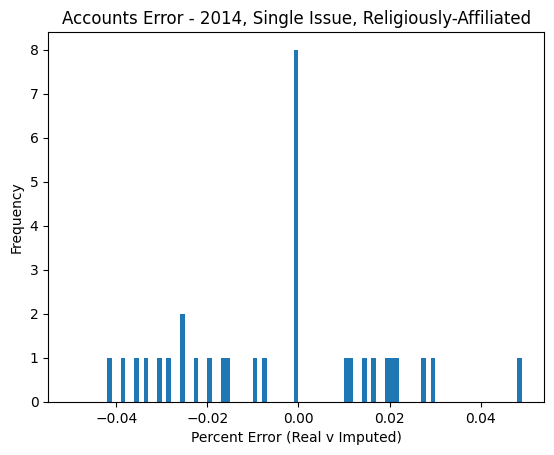

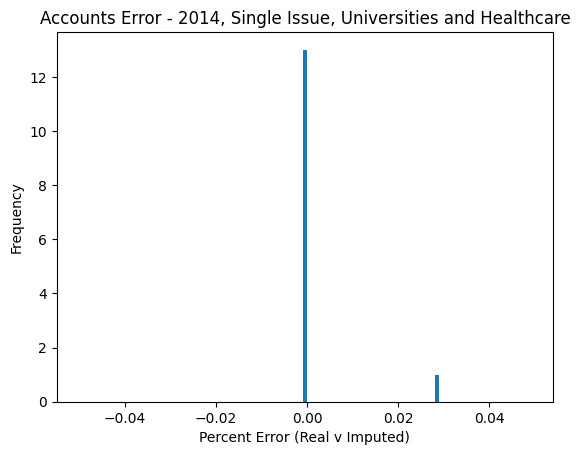

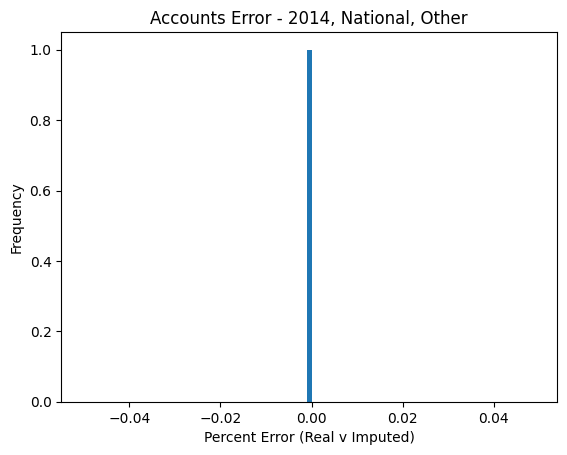

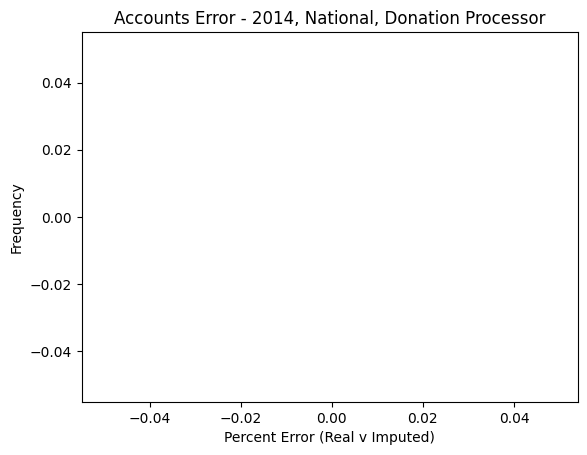

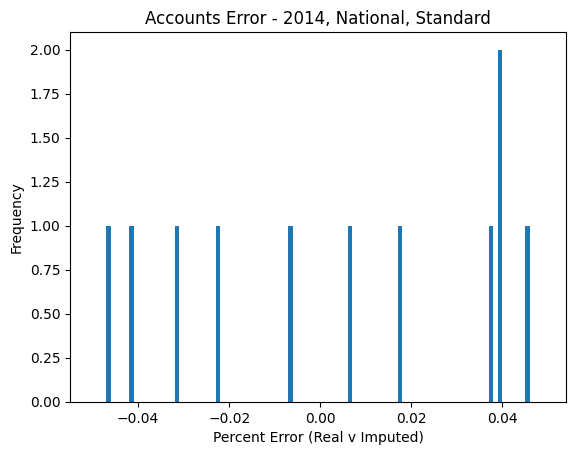

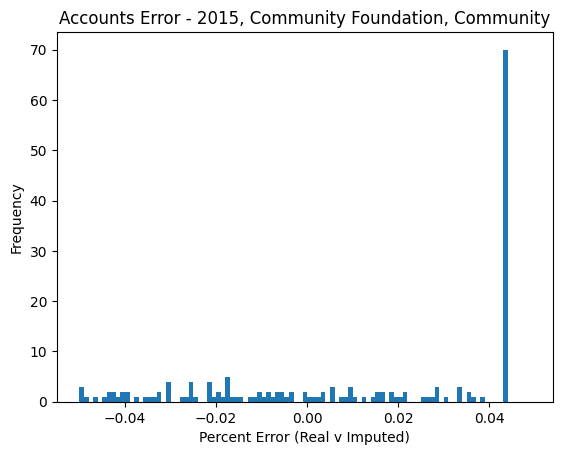

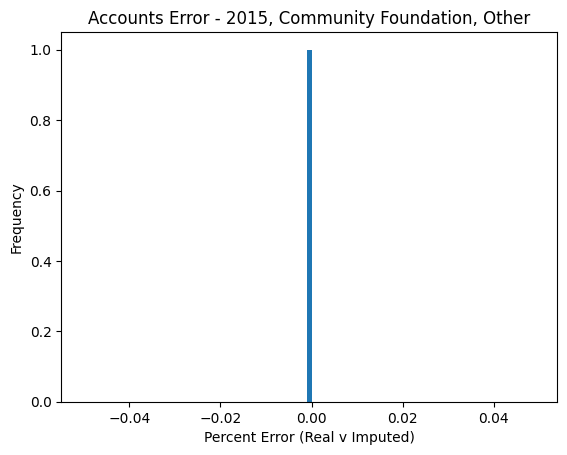

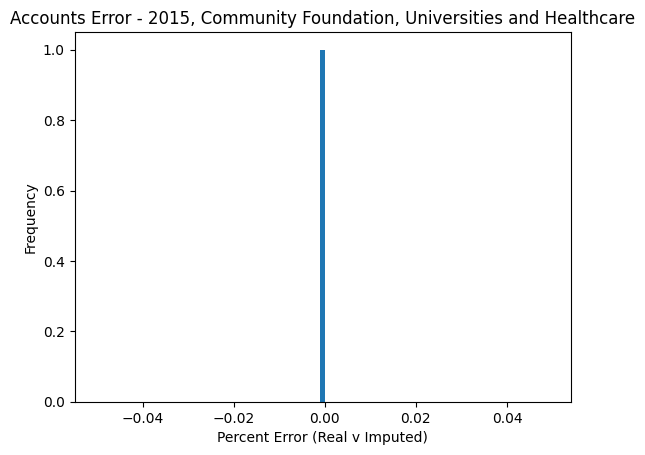

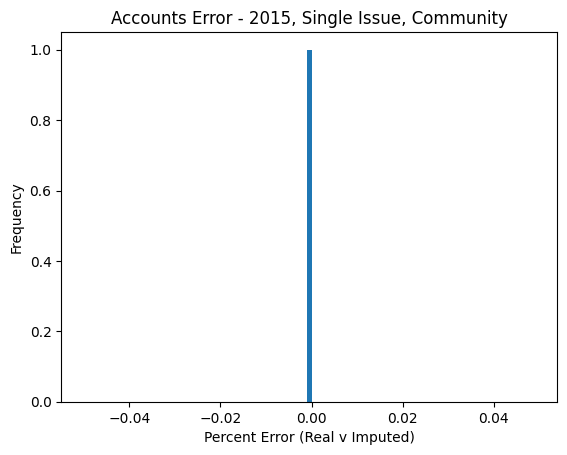

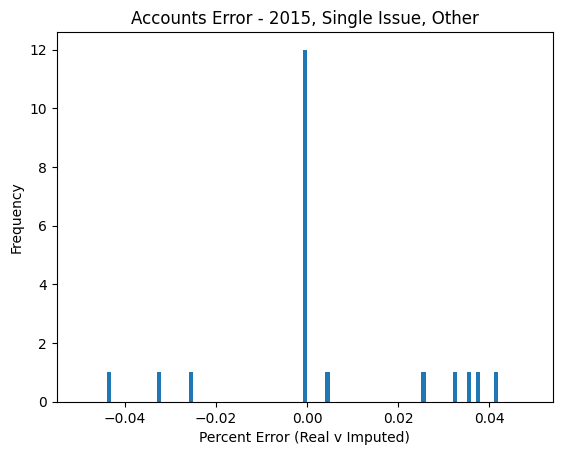

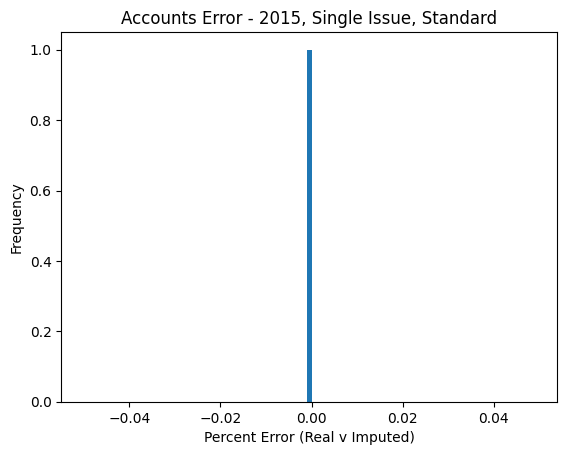

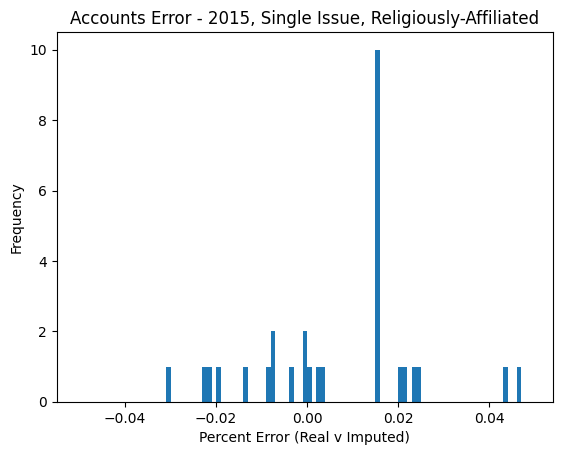

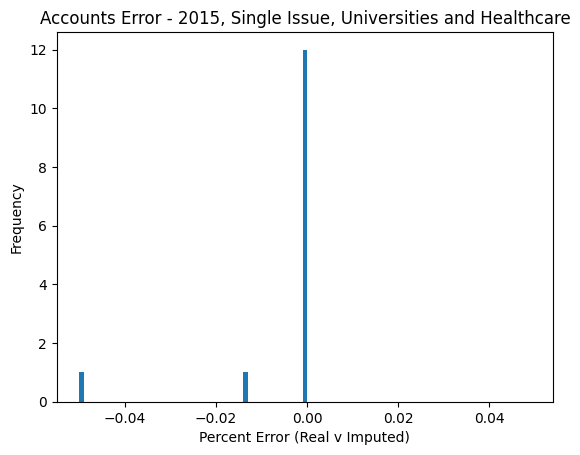

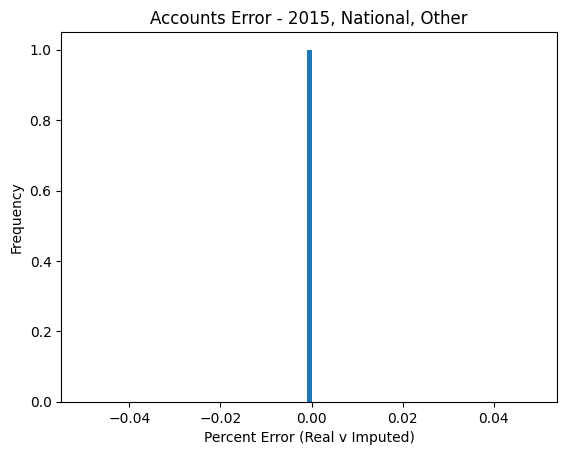

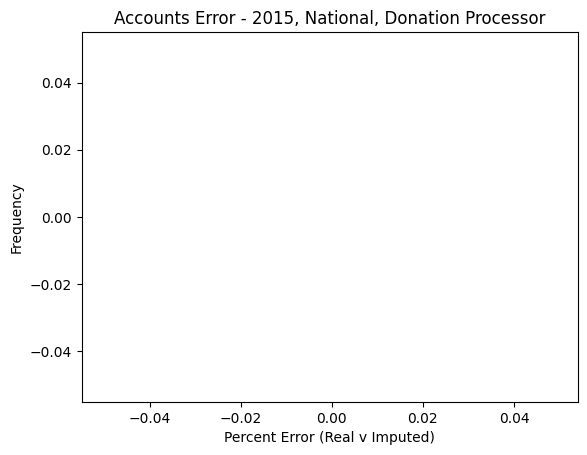

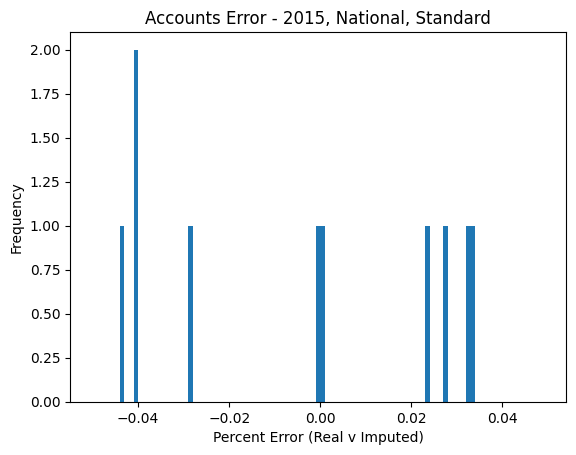

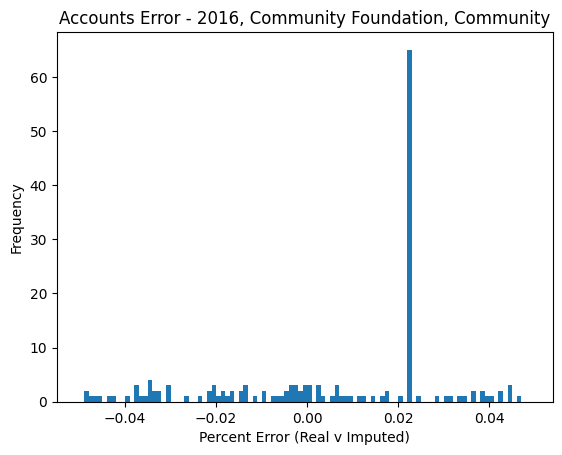

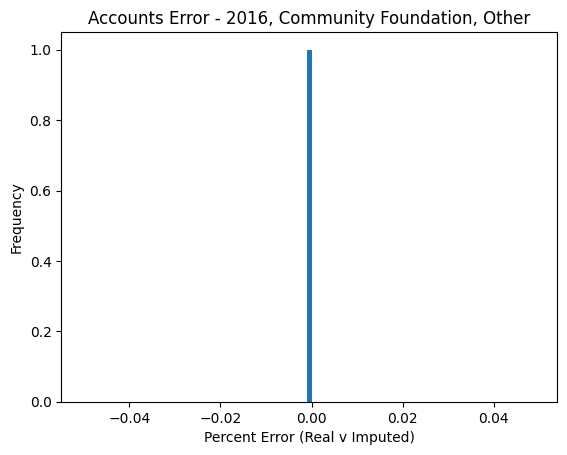

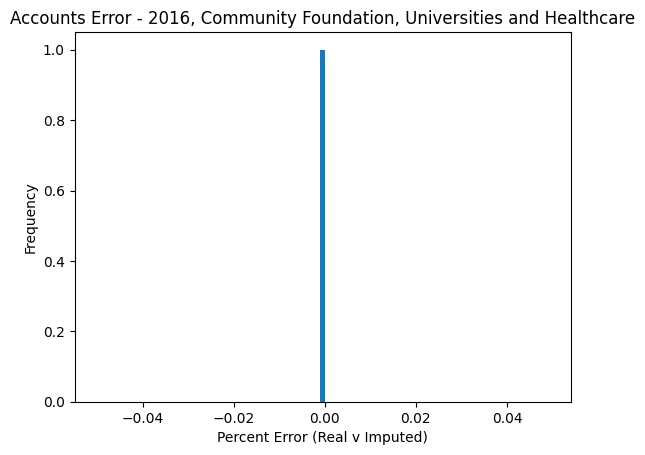

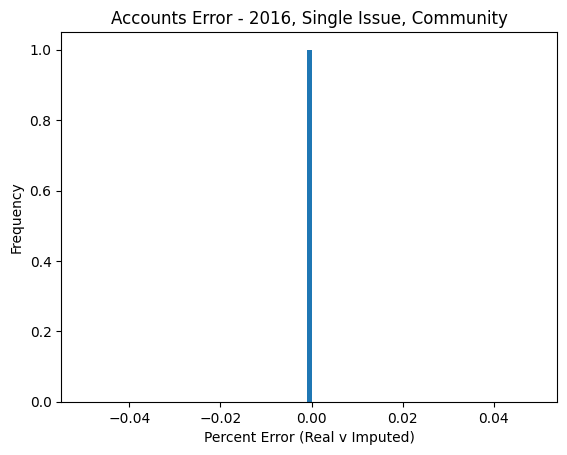

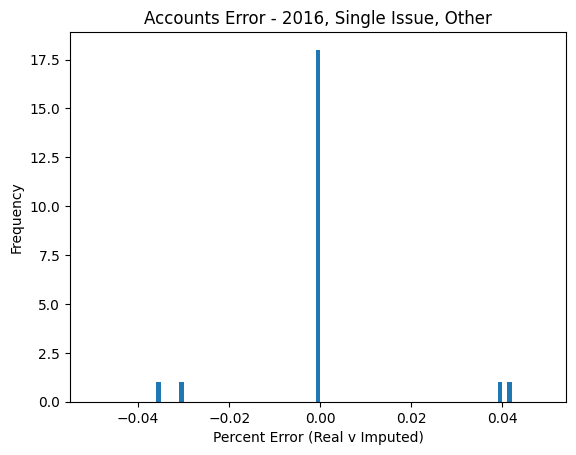

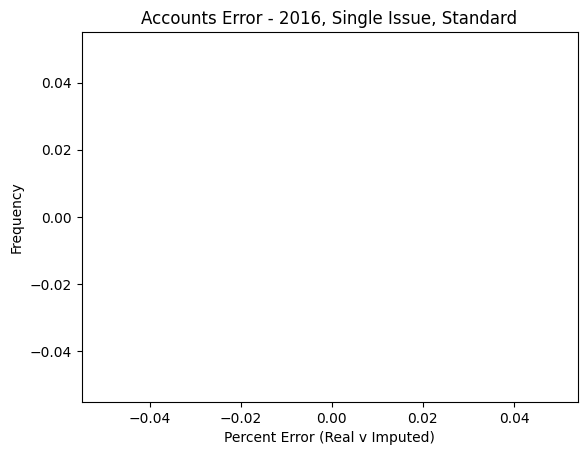

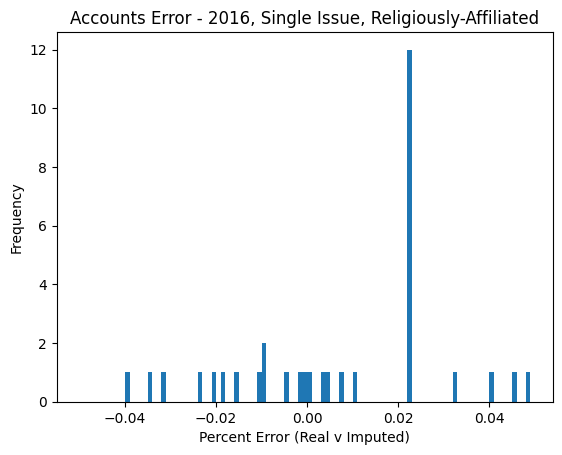

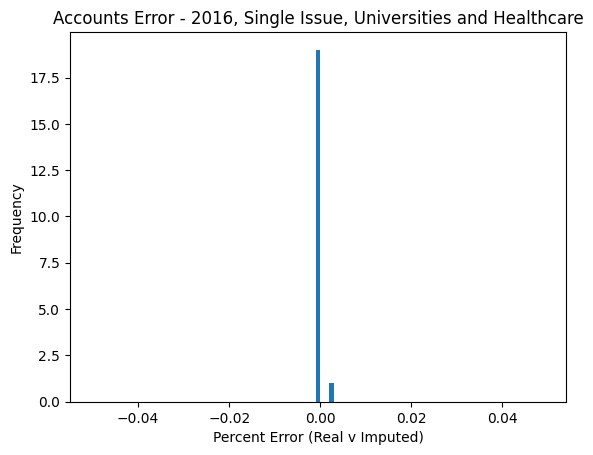

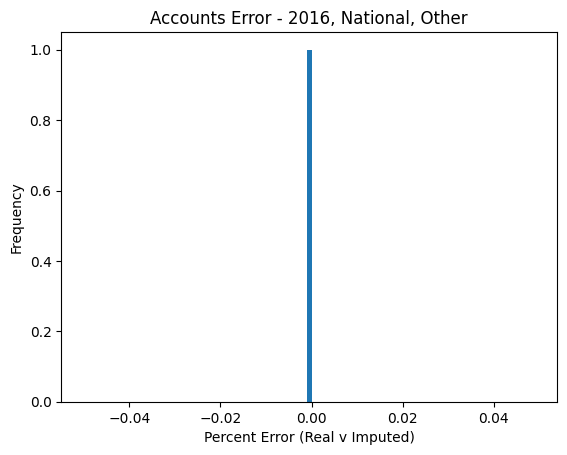

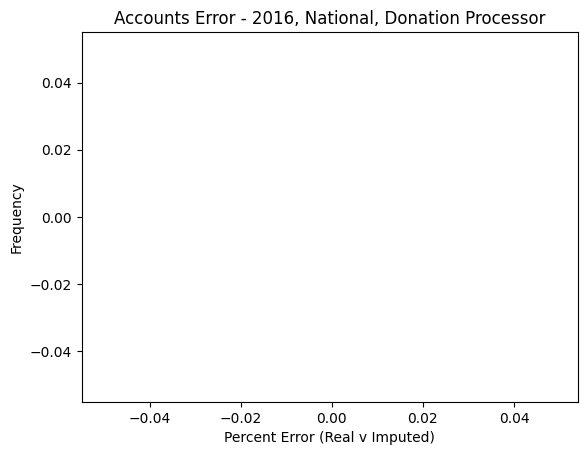

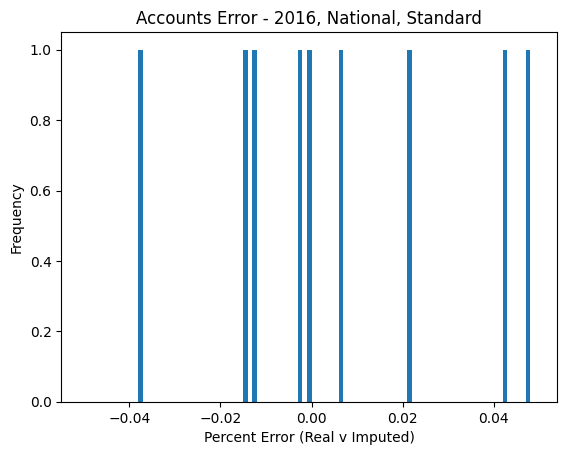

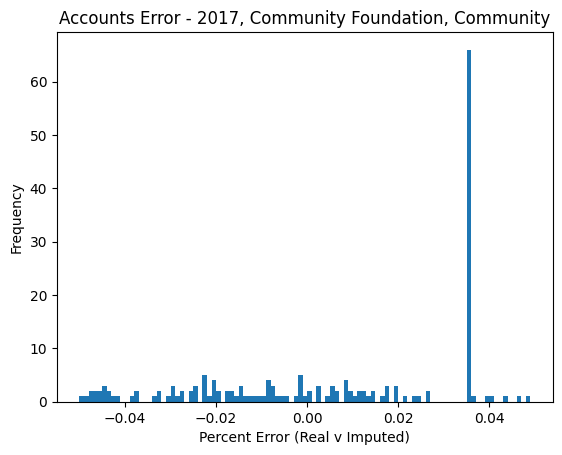

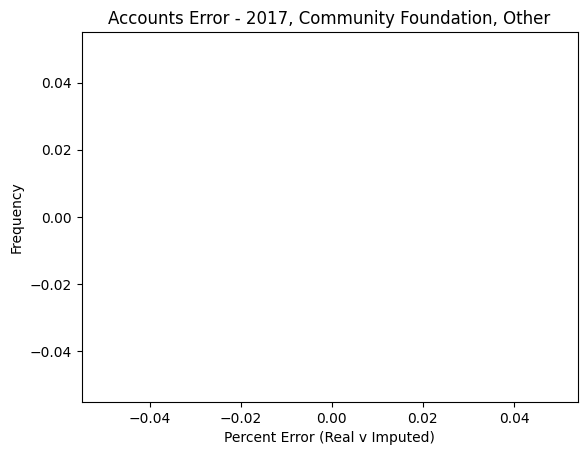

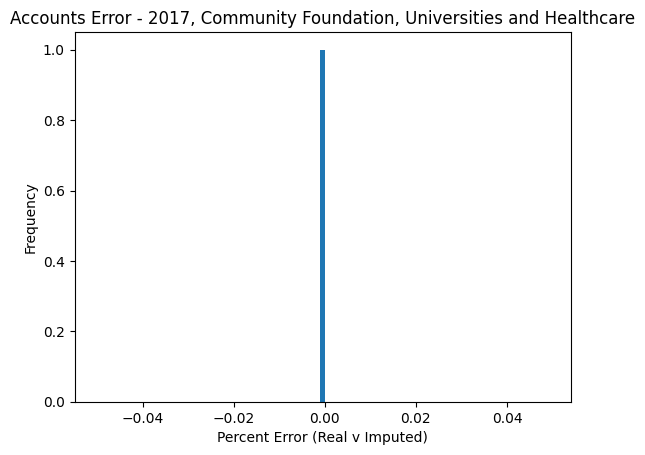

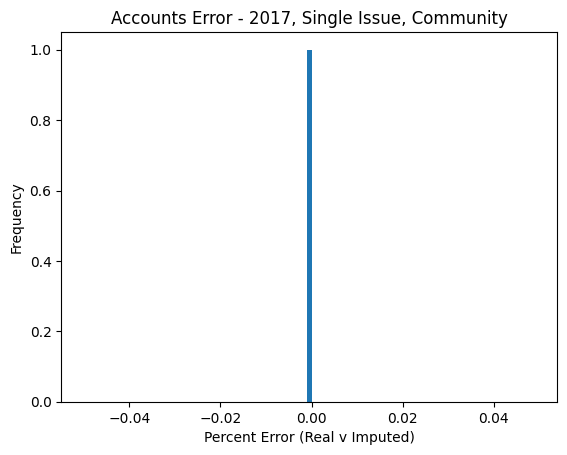

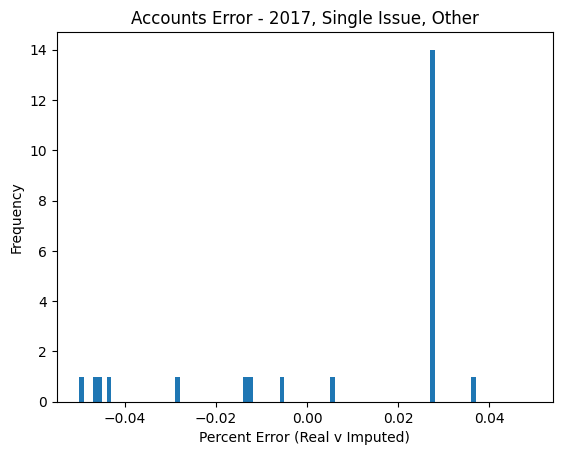

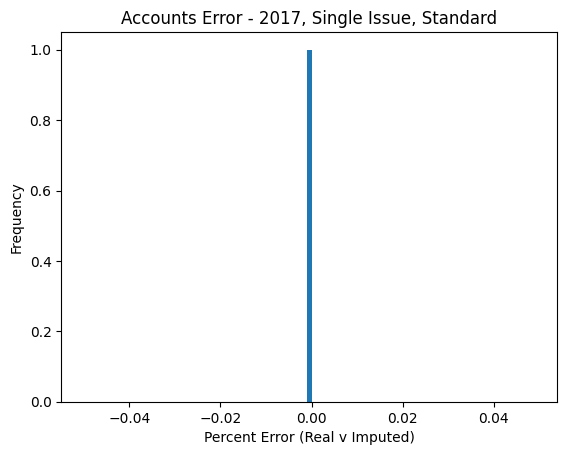

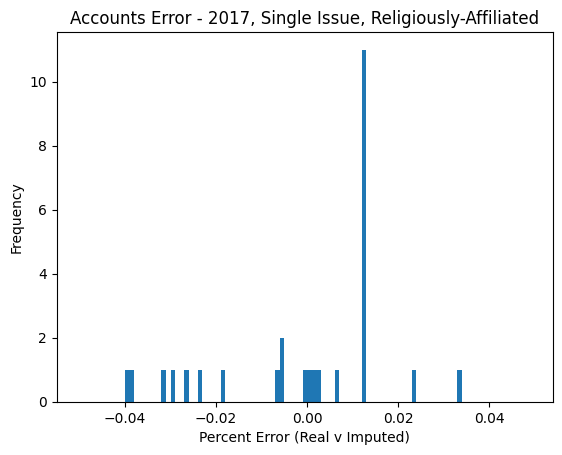

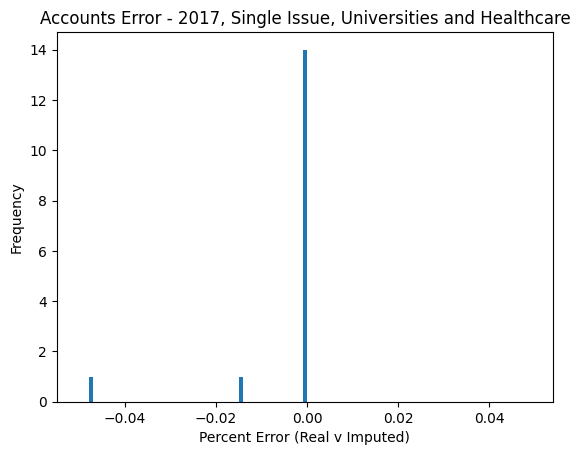

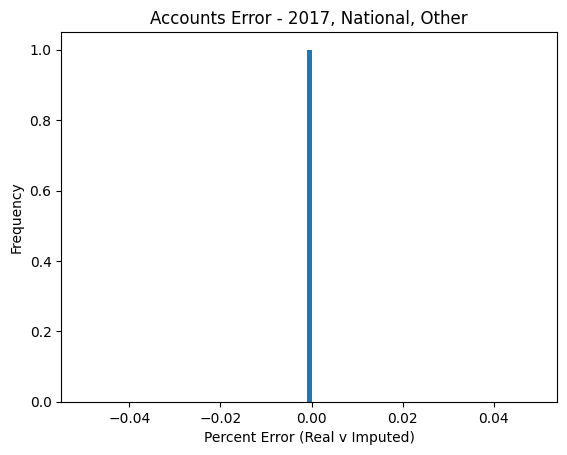

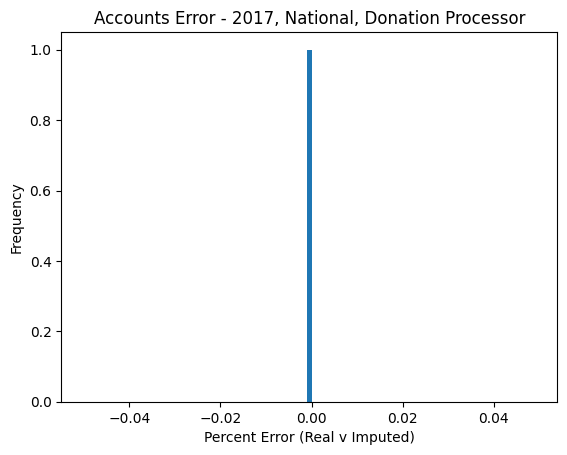

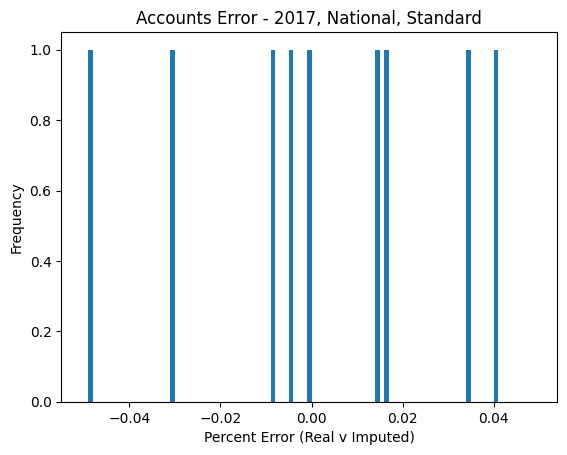

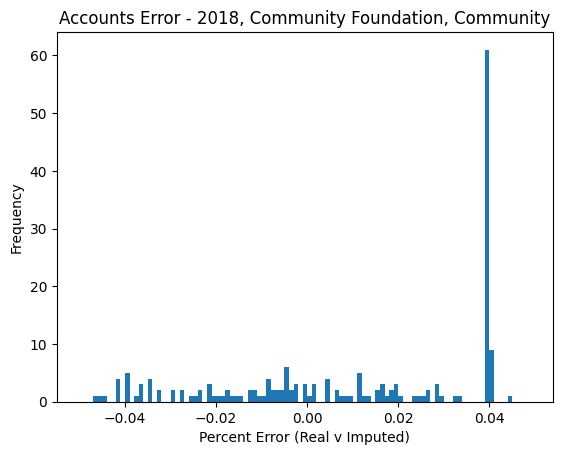

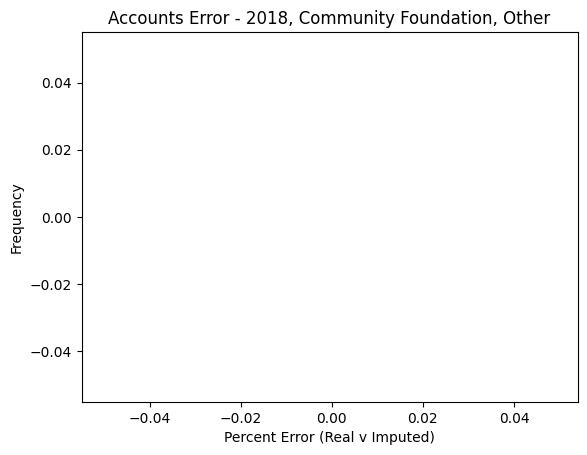

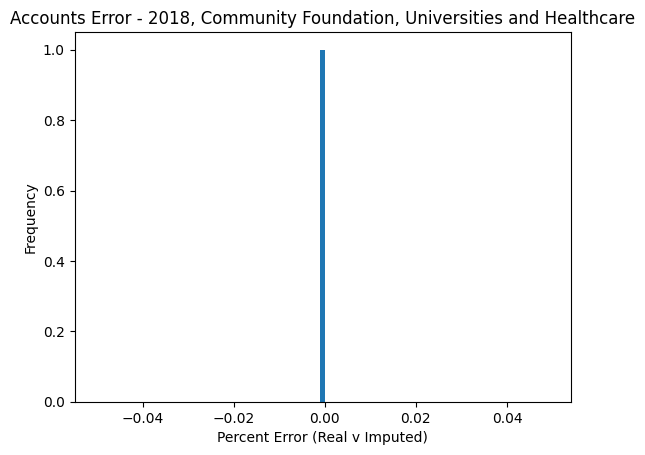

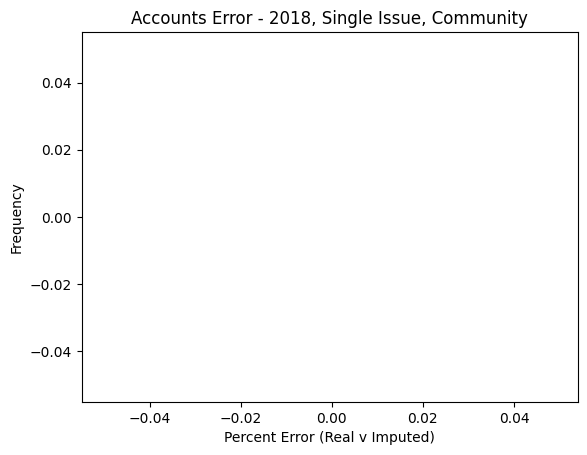

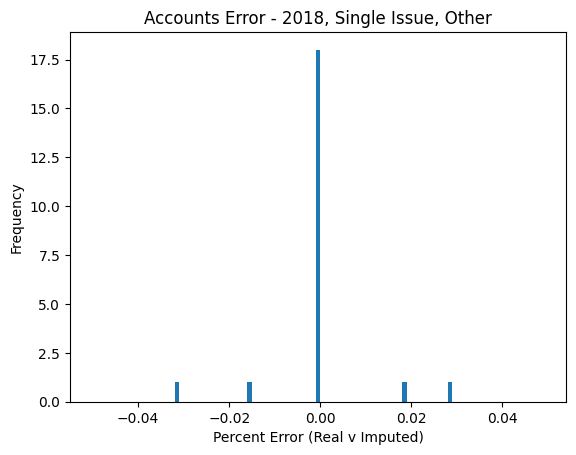

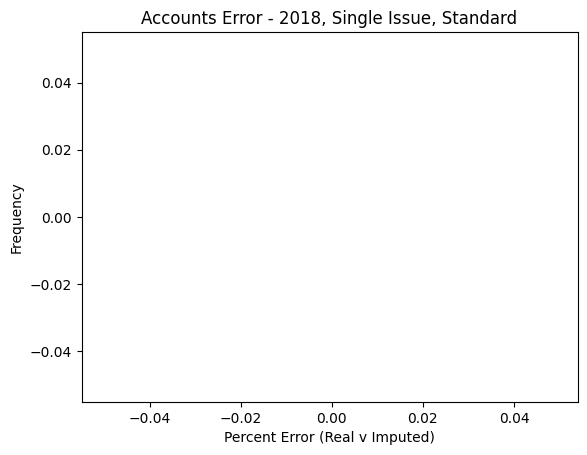

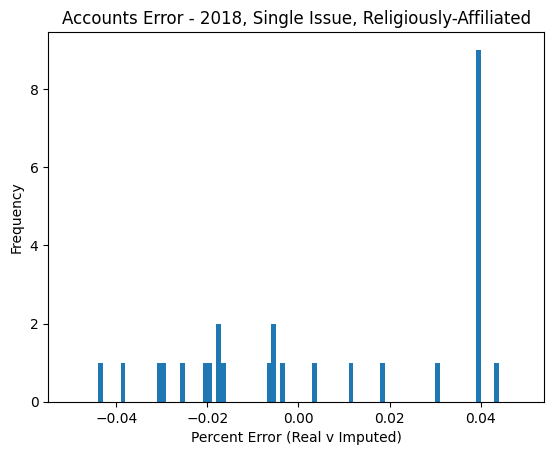

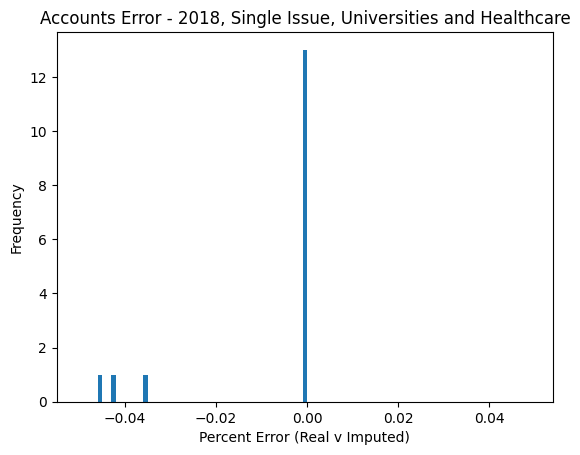

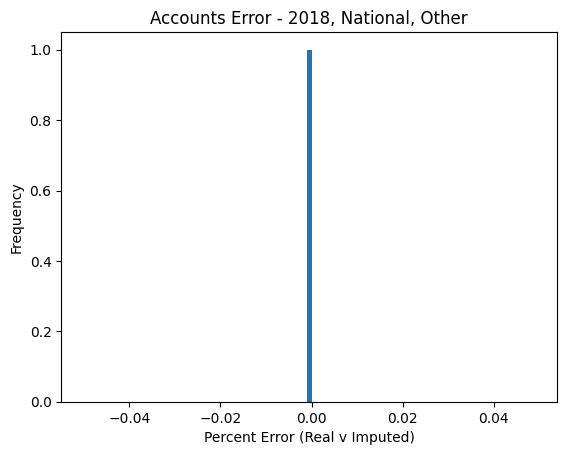

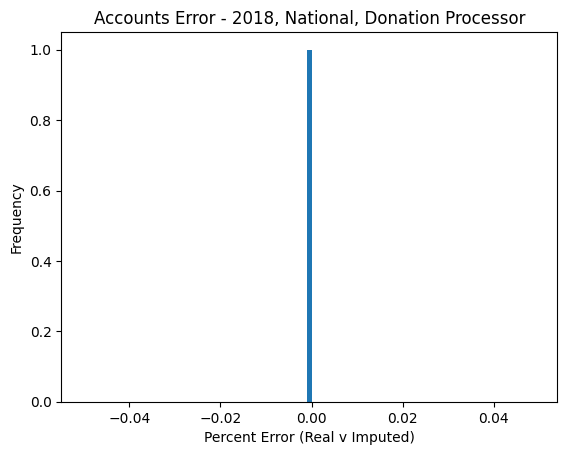

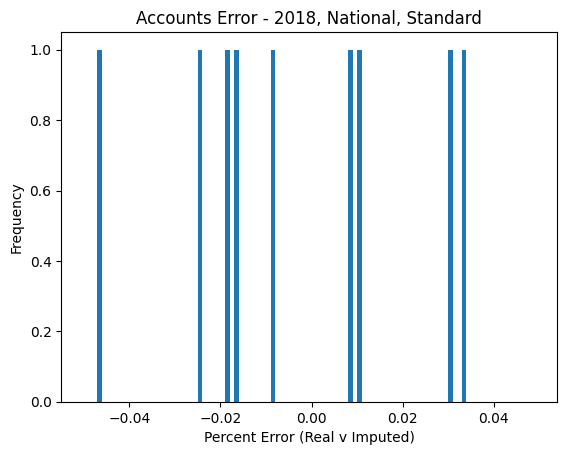

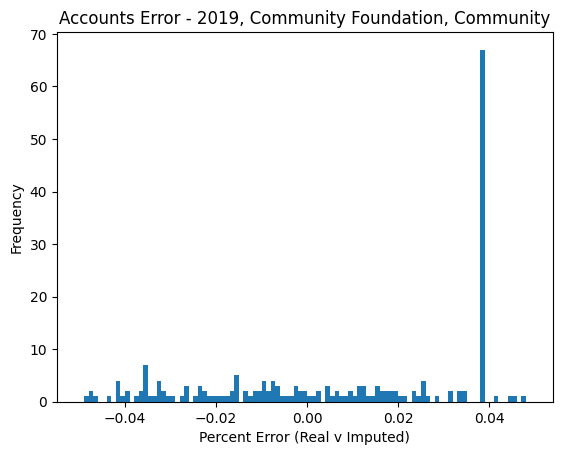

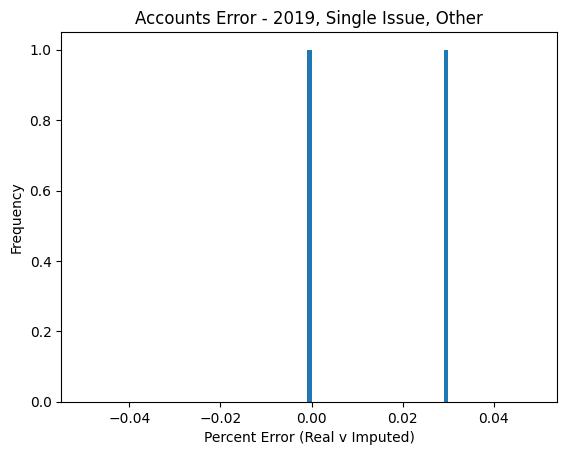

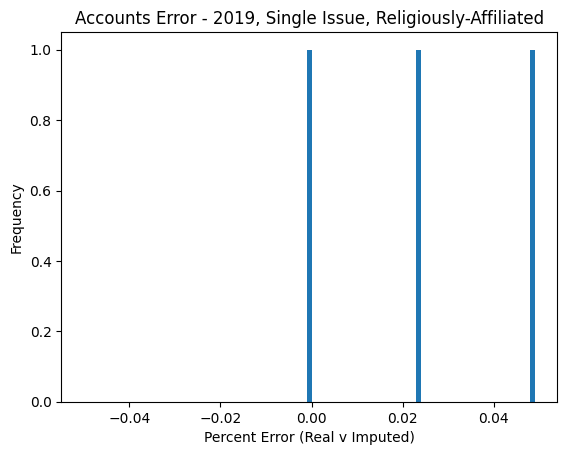

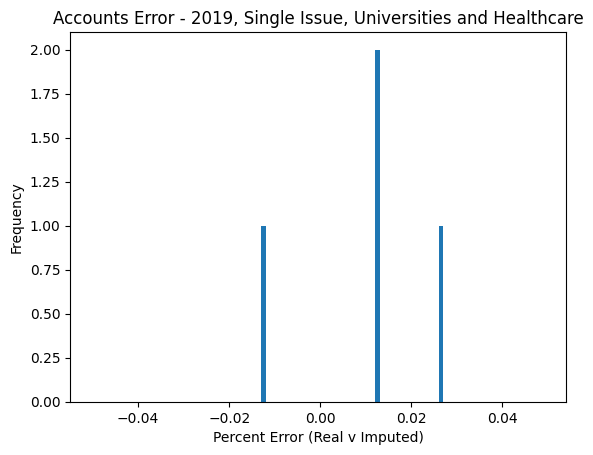

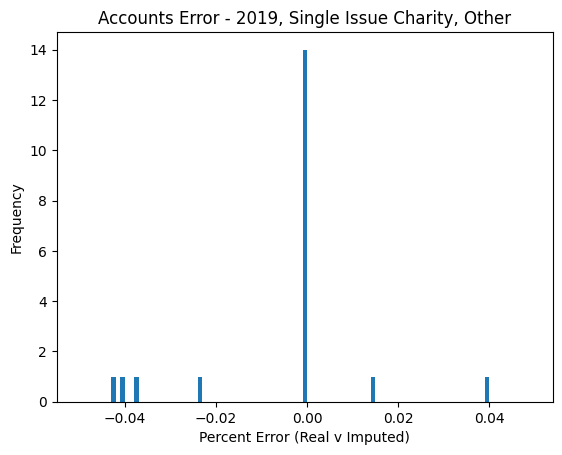

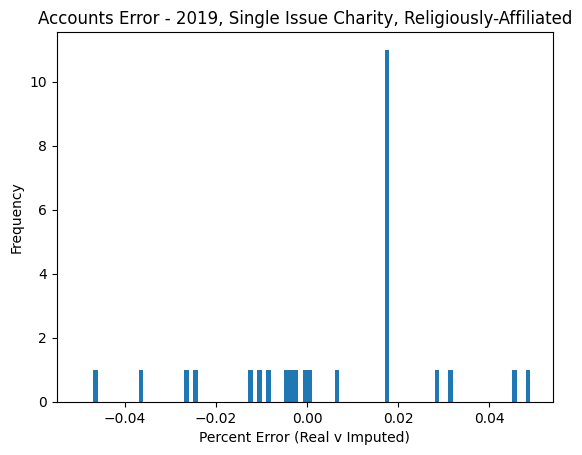

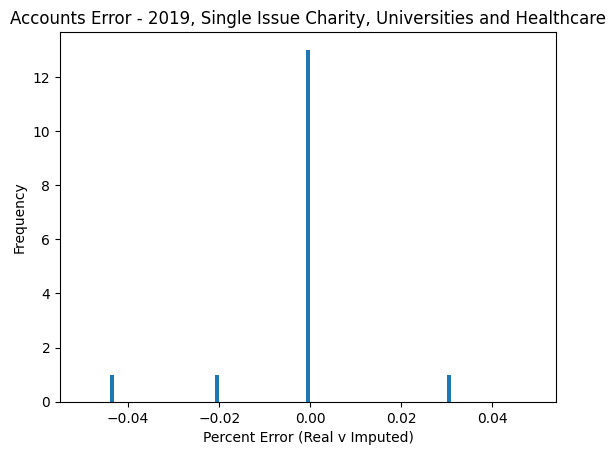

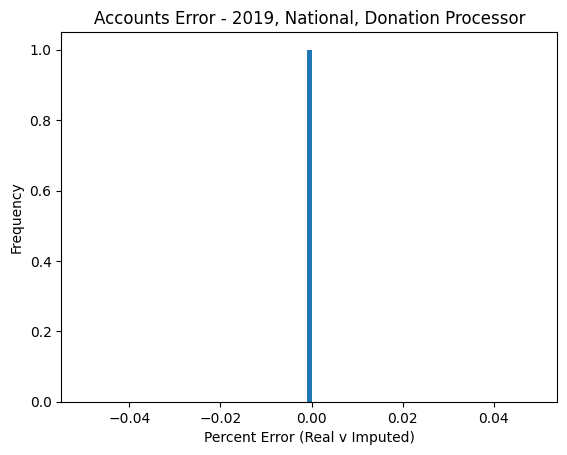

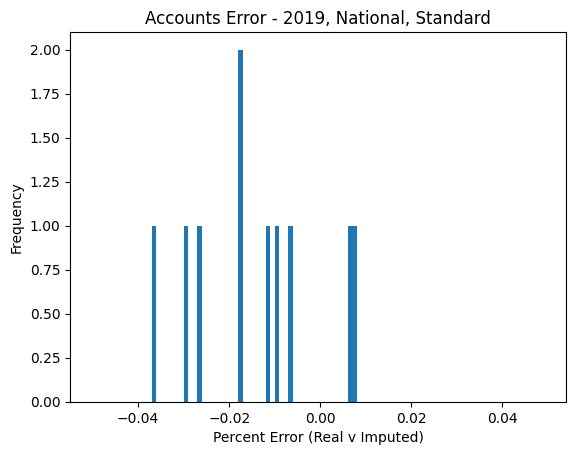

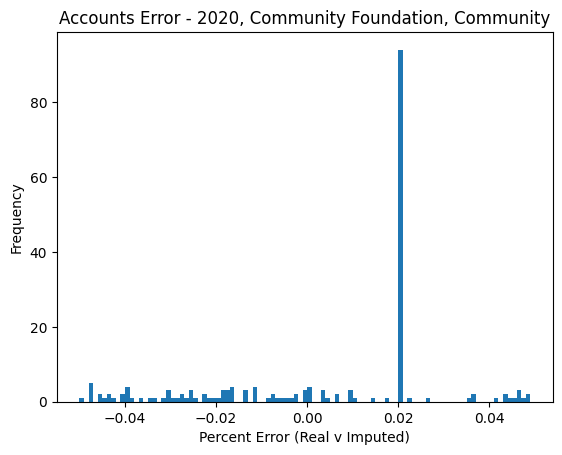

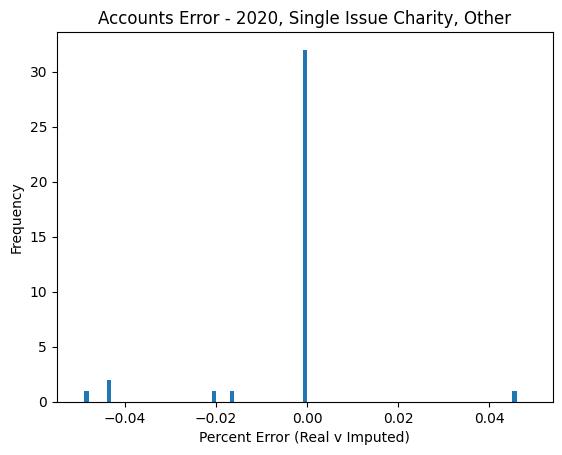

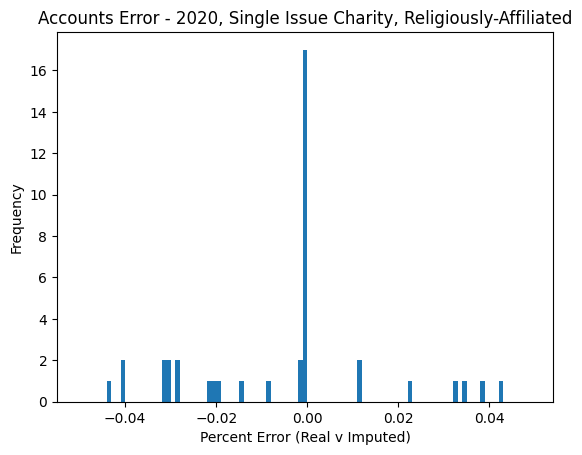

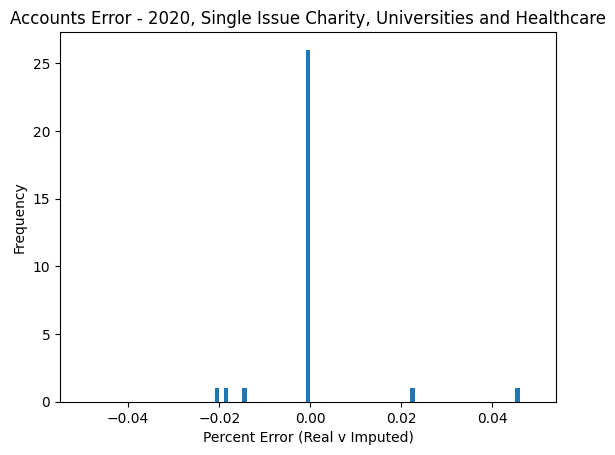

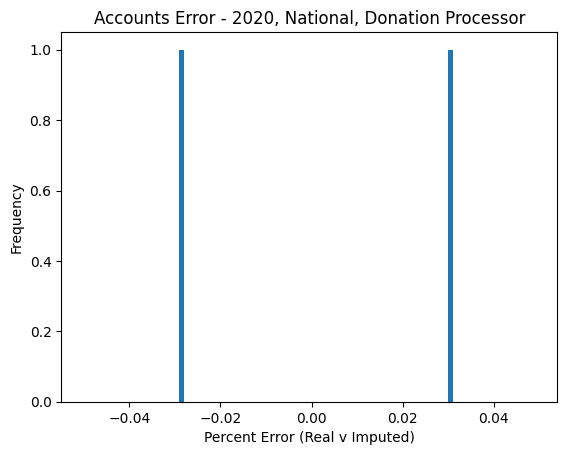

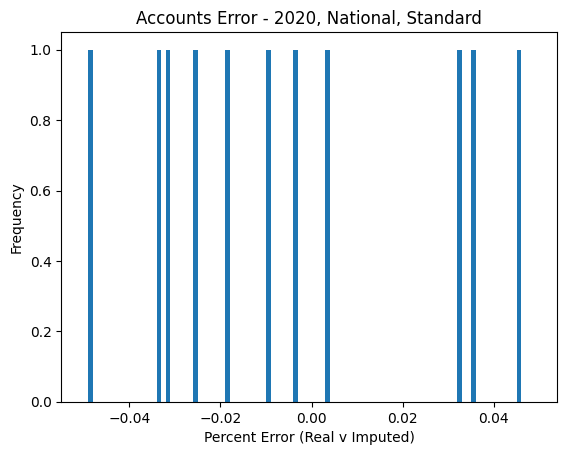

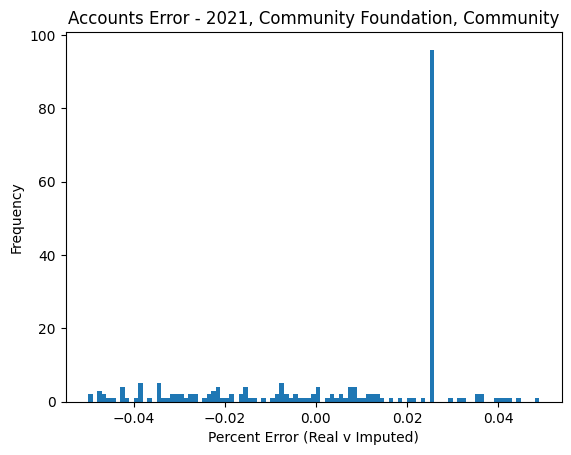

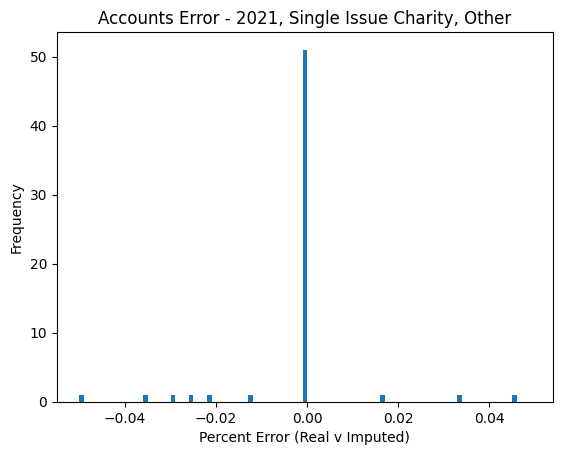

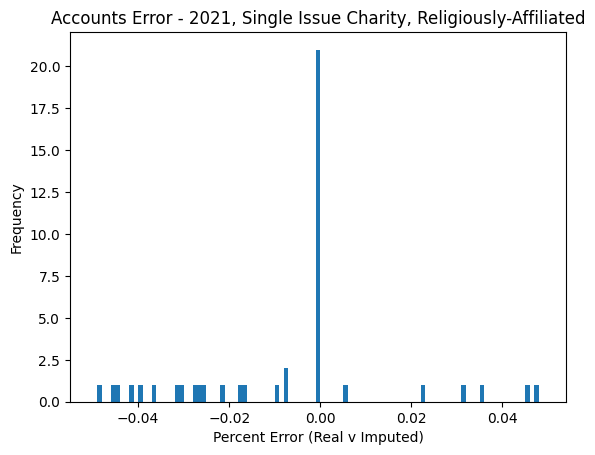

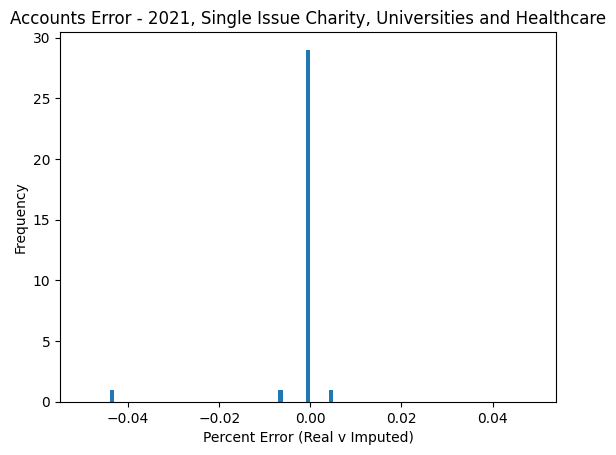

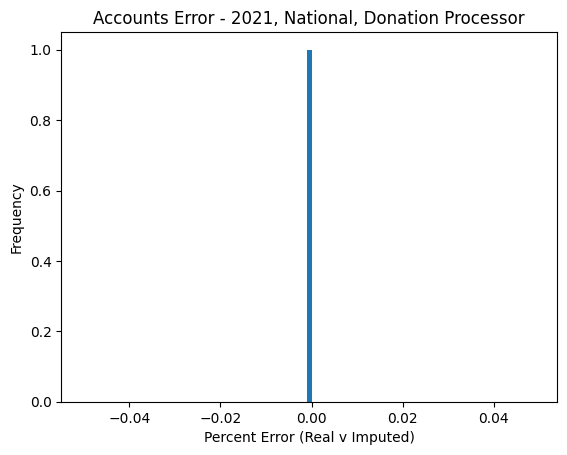

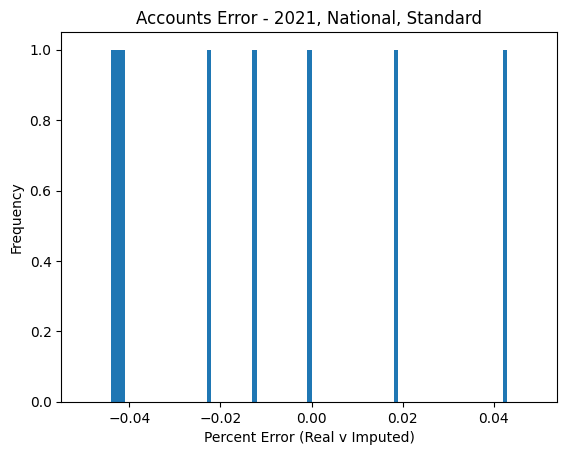

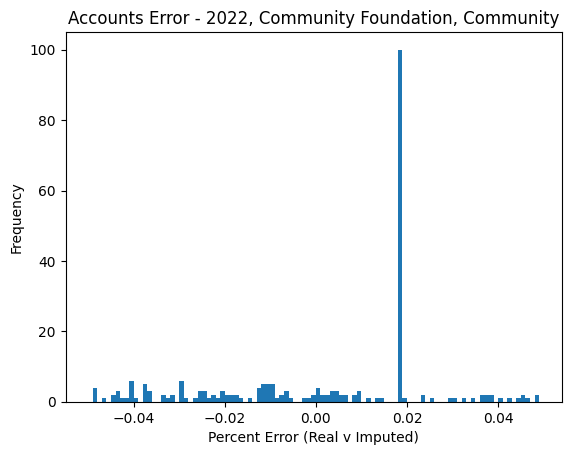

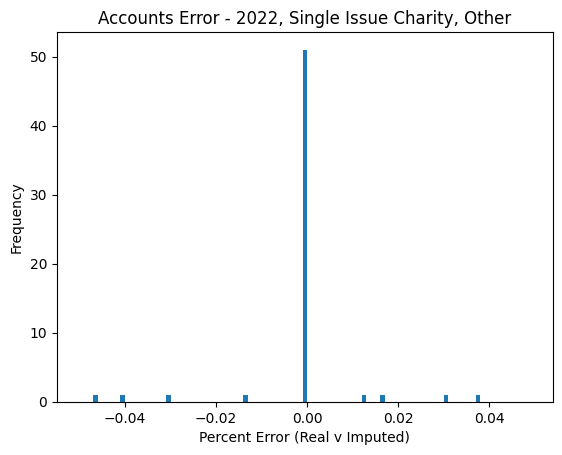

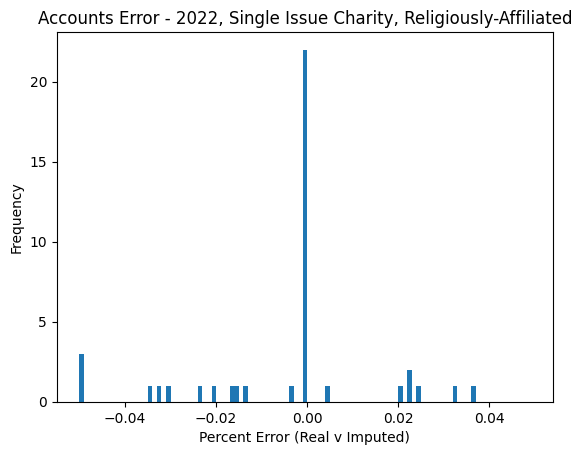

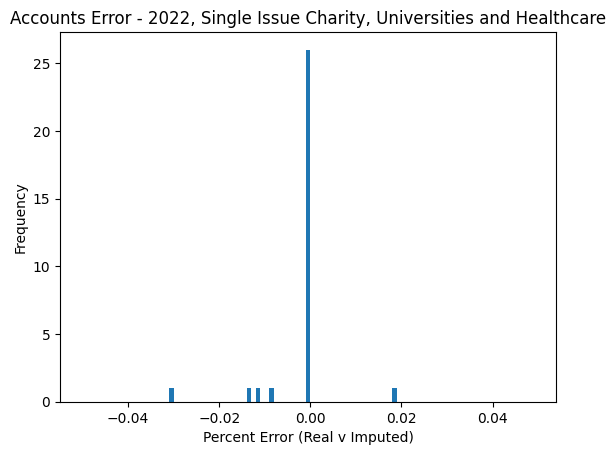

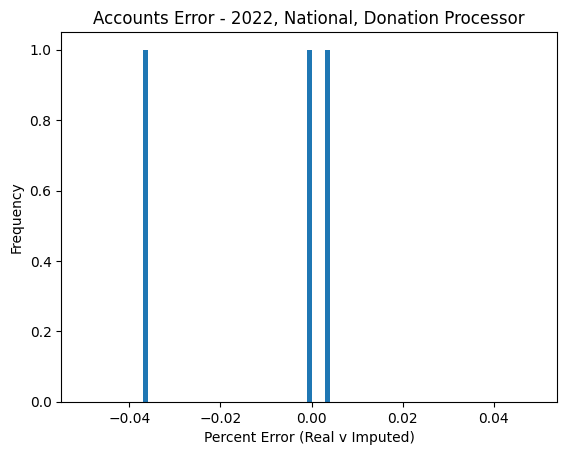

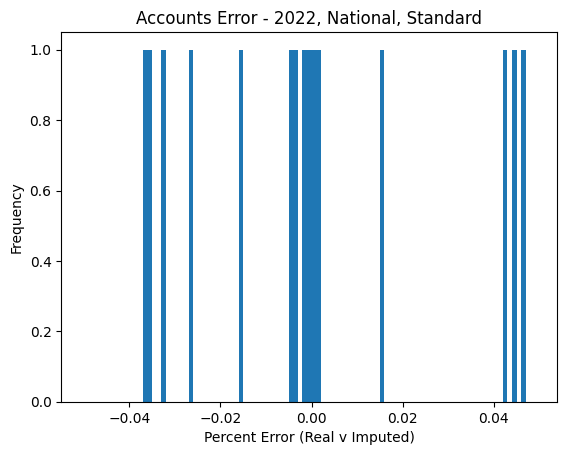

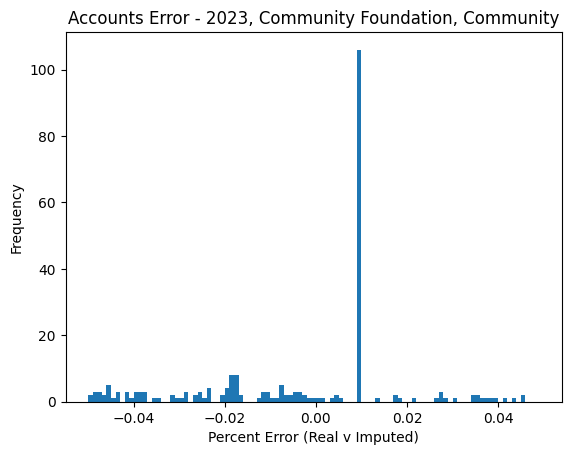

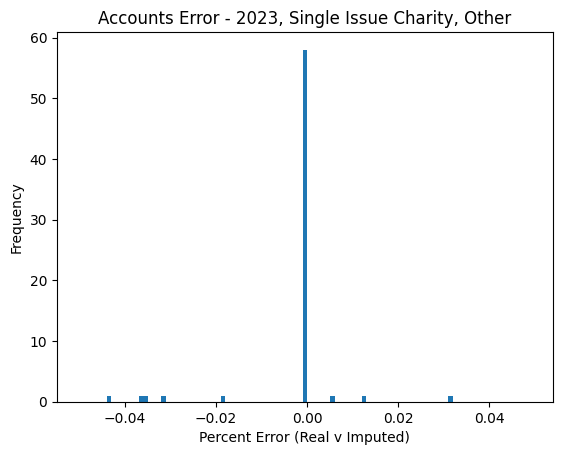

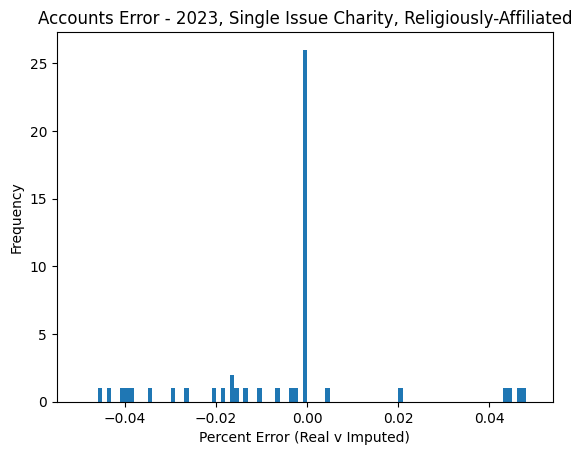

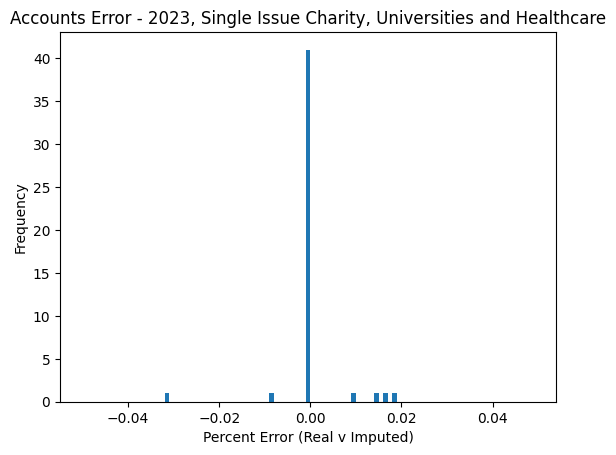

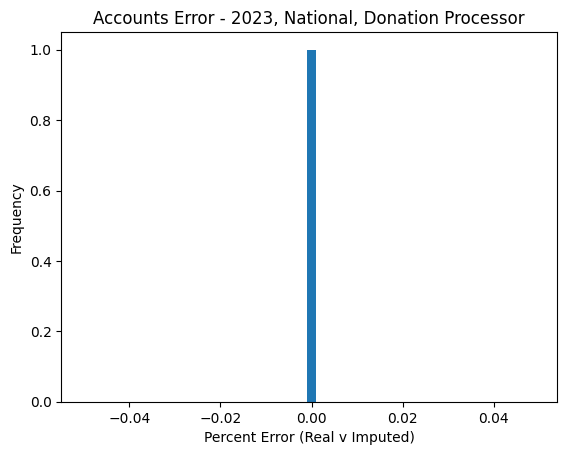

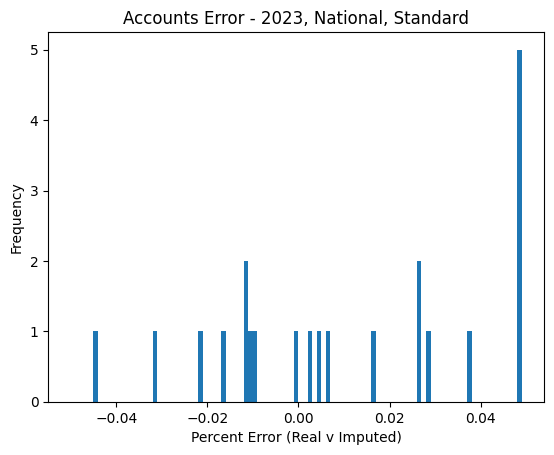

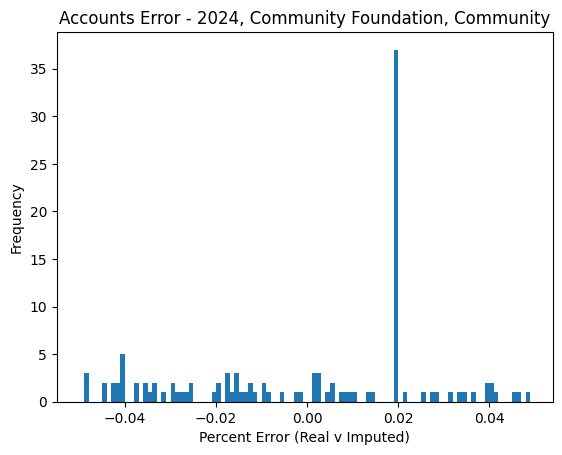

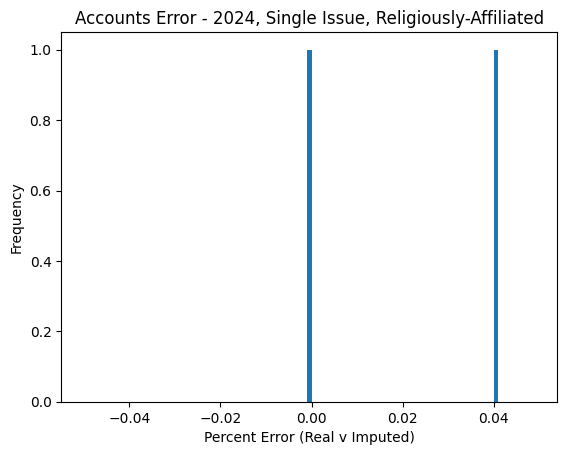

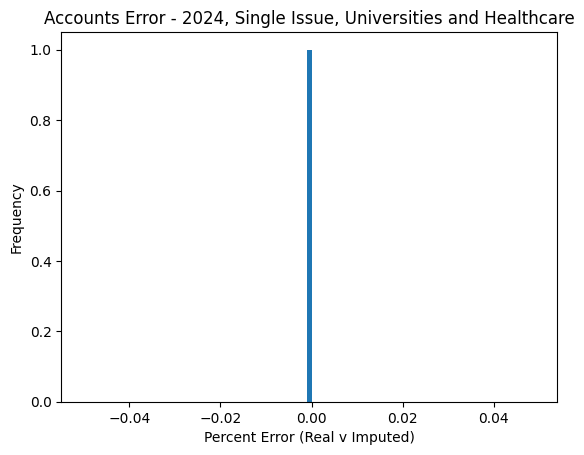

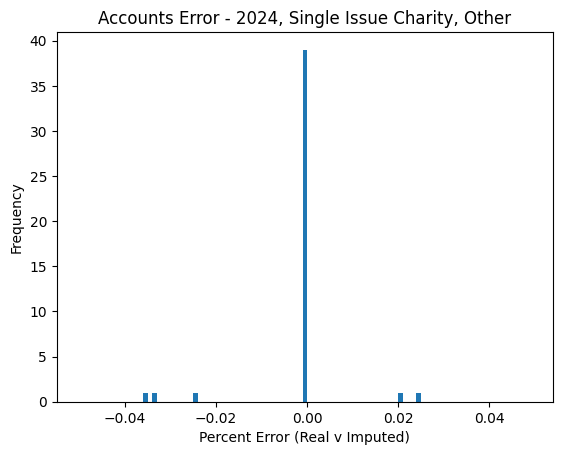

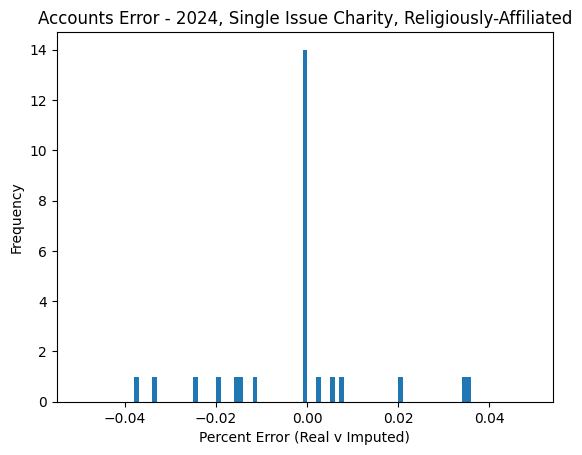

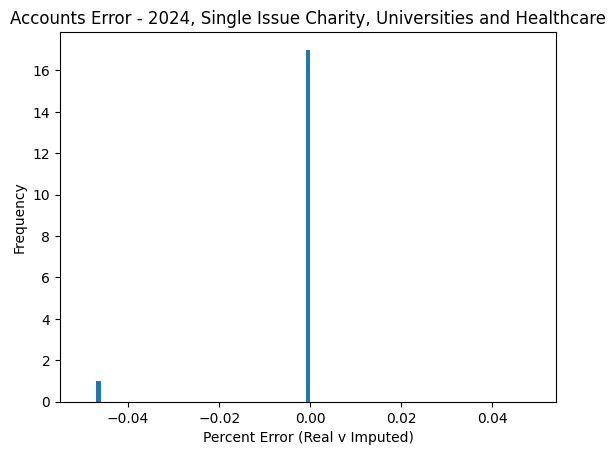

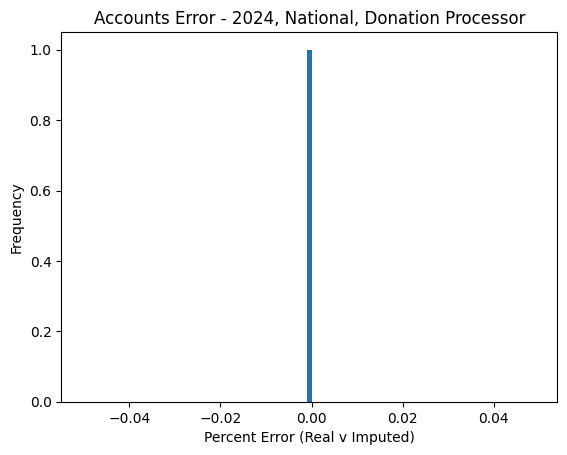

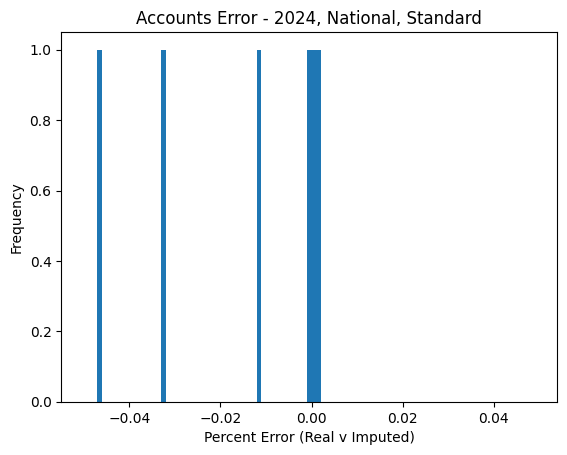

In [22]:
import numpy as np
import matplotlib.pyplot as plt

col_pos_y = df.columns.get_loc('Year')
col_pos_t = df.columns.get_loc('Type')
col_pos_s = df.columns.get_loc('subtype')
col_pos_a = df.columns.get_loc('Actual Error Accounts')

for Year in df['Year'].unique():
    for Type in df['Type'].unique():
        for subtype in df['subtype'].unique():

            errors = []  # RESET for each group

            for i in range(len(df)):
                if (
                    df.iloc[i, col_pos_y] == Year and
                    df.iloc[i, col_pos_t] == Type and
                    df.iloc[i, col_pos_s] == subtype
                ):
                    errors.append(df.iloc[i, col_pos_a])

            # remove NaNs
            cleaned_errors = [x for x in errors if not np.isnan(x)]

            # skip empty cases
            if len(cleaned_errors) == 0:
              continue
            #print(cleaned_errors)
            bins_array = np.arange(-.05, .05, .001)
            plt.hist(cleaned_errors, bins=bins_array)
            plt.title(f"Accounts Error - {Year}, {Type}, {subtype}")
            plt.xlabel("Percent Error (Real v Imputed)")
            plt.ylabel("Frequency")
            plt.show()

In [10]:
df.head()

ein  Year  Accounts  Contributions    Grants       Assets  \
0  10391479  2007       270     13347384.0  10628512   95282896.0   
1  10391479  2008       276      8389212.0   7419626   68897739.0   
2  10391479  2009       278     10016375.0   8857052   83057576.0   
3  10391479  2010       284     14088617.0   7569699   97807493.0   
4  10391479  2011       296     19783555.0   9802671  106056922.0   

                   Type    subtype  year_diff  accounts_pct_change  ...  \
0  Community Foundation  Community        NaN                  NaN  ...   
1  Community Foundation  Community        1.0             0.022222  ...   
2  Community Foundation  Community        1.0             0.007246  ...   
3  Community Foundation  Community        1.0             0.021583  ...   
4  Community Foundation  Community        1.0             0.042254  ...   

   median_grants_growth  median_assets_growth  predicted_accounts  \
0                   NaN                   NaN                 NaN   
1              0.181462             -0.177510          289.471429   
2             -0.142366              0.133582          285.380531   
3              0.099772              0.112722          292.515914   
4              0.153378              0.043404          308.688304   

   predicted_contributions  predicted_grants  predicted_assets  \
0                      NaN               NaN               NaN   
1             6.666438e+06      8.766008e+06      5.666769e+07   
2             7.912323e+06      7.596112e+06      9.415256e+07   
3             1.765117e+07      8.324945e+06      1.088325e+08   
4             2.200347e+07      1.130619e+07      1.106602e+08   

   Actual Error Accounts  Actual Error Contributions  Actual Error Grants  \
0                    NaN                         NaN                  NaN   
1              -0.048810                    0.205356            -0.181462   
2              -0.026549                    0.210061             0.142366   
3              -0.029986                   -0.252868            -0.099772   
4              -0.042866                   -0.112210            -0.153378   

   Actual Error Assets  
0                  NaN  
1             0.177510  
2            -0.133582  
3            -0.112722  
4            -0.043404  

[5 rows x 25 columns]

In [26]:
df.to_excel(
    "For_Tyler.xlsx",
    index=False
)